# OLX Car Price Regression

## 1. Load Dataset

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

pd.set_option('display.max_columns', 100)

FILE_NAME = 'dataset.csv'
df = pd.read_csv(FILE_NAME)
df.head()

make                      m_type  \
0    mobil-bekas-suzuki   mobil-bekas-suzuki-ertiga   
1     mobil-bekas-honda      mobil-bekas-honda-brio   
2     mobil-bekas-honda      mobil-bekas-honda-brio   
3    mobil-bekas-toyota   mobil-bekas-toyota-avanza   
4  mobil-bekas-daihatsu  mobil-bekas-daihatsu-xenia   

                     m_type_variant  m_year  mileage  m_fuel  m_color  \
0            suzuki-ertiga-67359-gl  2014.0     70.0  bensin    putih   
1                honda-brio-66836-e  2015.0     50.0  bensin  abu-abu   
2                honda-brio-66836-e  2014.0     40.0  bensin    merah   
3             toyota-avanza-67429-g  2013.0     50.0  bensin    hitam   
4  daihatsu-xenia-66723-r-13-sporty  2011.0    110.0  bensin   silver   

  m_transmission   m_body m_engine_capacity  \
0      automatic      mpv      1000-to-1500   
1      automatic      NaN               NaN   
2      automatic  minibus      1000-to-1500   
3         manual      mpv      1000-to-1500   
4         manual  minibus      1000-to-1500   

                                           m_feature         m_seller_type  \
0    air-bag,electric-window,jok-kulit,sensor-parkir     seller-type-diler   
1                                                NaN                   NaN   
2    jok-kulit,sensor-parkir,air-bag,electric-window     seller-type-diler   
3                                                NaN     seller-type-diler   
4  bluetooth-audio,electric-window,gps,kamera-bel...  seller-type-individu   

     country  country_id           region  region_id             city  \
0  Indonesia     1000001   Jakarta D.K.I.    2000007    Jakarta Utara   
1  Indonesia     1000001       Jawa Barat    2000009       Bogor Kota   
2  Indonesia     1000001       Jawa Barat    2000009      Bekasi Kab.   
3  Indonesia     1000001   Jakarta D.K.I.    2000007    Jakarta Timur   
4  Indonesia     1000001  Yogyakarta D.I.    2000032  Yogyakarta Kota   

   city_id            district  district_id  score        price  
0  4000032          Pademangan    5000505.0    1.0  118000000.0  
1  4000021  Bogor Utara - Kota    5001311.0    1.0  118000000.0  
2  4000003      Cikarang Utara    5000779.0    1.0  118000000.0  
3  4000031              Cakung    5000492.0    1.0  119000000.0  
4  4000072          Mergangsan    5000458.0    1.0  118000000.0

## 2. EDA

### 2.1 Data Description

Semua kolom, kecuali kolom *price* dan *mileage* merupakan tipe *categorical*. <br>
Kolom *m_feature* merupakan kolom dengan nilai aggregate sehingga nilainya dapat dipisah dan dapat dilakukan one hot encoding untuk preprocessing.

In [2]:
df.describe()

m_year       mileage  country_id     region_id       city_id  \
count  56339.000000  56339.000000     56340.0  5.634000e+04  5.634000e+04   
mean    2010.505671     76.923197   1000001.0  2.000012e+06  3.550276e+10   
std        7.304325     58.677342         0.0  8.246341e+00  5.958030e+12   
min     1985.000000      5.000000   1000001.0  2.000001e+06  4.000001e+06   
25%     2008.000000     35.000000   1000001.0  2.000007e+06  4.000030e+06   
50%     2013.000000     65.000000   1000001.0  2.000009e+06  4.000067e+06   
75%     2016.000000    105.000000   1000001.0  2.000011e+06  4.000202e+06   
max     2019.000000    301.000000   1000001.0  2.000035e+06  1.000000e+15   

        district_id    score         price  
count  5.613900e+04  56340.0  5.634000e+04  
mean   5.001860e+06      1.0  1.745118e+08  
std    1.900860e+03      0.0  4.497982e+08  
min    5.000001e+06      1.0  2.000000e+05  
25%    5.000485e+06      1.0  8.700000e+07  
50%    5.001289e+06      1.0  1.220000e+08  
75%    5.002560e+06      1.0  1.850000e+08  
max    5.007094e+06      1.0  8.975000e+10

In [3]:
original_columns = df.columns

### 2.2 NaN Counts

Sebelumnya perlu di cek kolom" apa saja yang memiliki nan value

In [4]:
df.isnull().sum()

make                     0
m_type                   1
m_type_variant        1862
m_year                   1
mileage                  1
m_fuel                   0
m_color                  0
m_transmission           1
m_body                8180
m_engine_capacity     6376
m_feature            17631
m_seller_type         9389
country                  0
country_id               0
region                   0
region_id                0
city                     0
city_id                  0
district               201
district_id            201
score                    0
price                    0
dtype: int64

dari sisi percentage : 

In [5]:
df.isnull().sum() / df.shape[0] * 100

make                  0.000000
m_type                0.001775
m_type_variant        3.304934
m_year                0.001775
mileage               0.001775
m_fuel                0.000000
m_color               0.000000
m_transmission        0.001775
m_body               14.518992
m_engine_capacity    11.317004
m_feature            31.293930
m_seller_type        16.664892
country               0.000000
country_id            0.000000
region                0.000000
region_id             0.000000
city                  0.000000
city_id               0.000000
district              0.356763
district_id           0.356763
score                 0.000000
price                 0.000000
dtype: float64

### 2.3 Unique Counts

In [6]:
import numpy as np

unique_counts = pd.DataFrame([[column_name, len(df[column_name].unique())] for column_name in df.columns])
unique_counts.columns = ['column_name', 'unique_counts']
unique_counts

column_name  unique_counts
0                make             56
1              m_type            544
2      m_type_variant           1645
3              m_year             36
4             mileage             62
5              m_fuel              4
6             m_color             14
7      m_transmission              4
8              m_body             19
9   m_engine_capacity              6
10          m_feature           3158
11      m_seller_type              3
12            country              1
13         country_id              1
14             region             34
15          region_id             34
16               city            355
17            city_id            355
18           district           2154
19        district_id           2274
20              score              1
21              price           2263

Jika diperhatikan dari jumlah unique_counts - `score`, `country`, dan `country_id` hanya memiliki satu nilai unik, sehingga dapat diabaikan untuk selanjutnya

`country` dan `country_id` dapat di **drop**, karena semua row memiliki value yang sama <br>

untuk `region`-`region_id`, dan `city`-`city_id` mapping yang dihasilkan 1 to 1, artinya salah satu dari id / namanya dapat di **drop salah satu** <br>

tetapi untuk `district` dan `district_id` ada perbedaan, sehingga **perlu dilakukan investigasi lanjut**

untuk `score` juga dapat di **drop** karena hanya memiliki 1 value

### 2.3.1 District with multiple id

Jika diperhatikan dari tabel sebelumnya, hanya `district` dan `district_id` yang mappingnya tidak match, maka dari itu perlu dicek lebih lanjut

In [7]:
def not_one_to_one(row):
    if len(row) == 1:
        return True
    return False

In [8]:
_df = df.groupby('district')['district_id'].apply(set)

In [9]:
district_with_multiple_id = []
for x in _df.to_list():
    if len(x) > 1:
        district_with_multiple_id.append(x)
        
print("jumlah district : {}".format(len(district_with_multiple_id)))
district_with_multiple_id[:5]

jumlah district : 104


[{5001757.0, 5003402.0},
 {5001695.0, 5002214.0},
 {5001396.0, 5002305.0, 5003898.0},
 {5000626.0, 5005261.0},
 {5000011.0, 5000134.0, 5001291.0}]

jadi, terlihat, ada 104 `district` yang memiliki mapping id yang lebih dari 1, kemungkinan akan menggunakan `district_id` dibandingkan `district`, karena id merupakan superset

## 3. Data Preprocessing

### 3.1 Normalisasi Data

### 3.1.1 Convert ID
`region_id`, `city_id`, `district_id` kemungkinan besar akan digunakan, namun angka yang digunakan sebagai ID sangat besar, oleh karena itu, perlu ada normalisasi

untuk `region_id` karena selalu diawali `20000` + 2 digit kode kota, maka 5 angka pertama dapat dihapus

In [10]:
df['region_id'] = df['region_id'].apply(lambda x : x - 2000000)

untuk `city_id` karena selalu diawali `4000` + 3 digit kode kota, maka 4 angka pertama dapat dihapus

In [11]:
df['city_id'] = df['city_id'].apply(lambda x : x - 4000000)

sedangkan untuk `district_id` karena selalu diawali `500` + 4 digit kode kota, maka 3 angka pertama dapat dihapus

In [12]:
df['district_id'] = df['district_id'].apply(lambda x : x - 5000000)

### 3.1.2 Normalisasi harga

Karena harga berkisar jutaan, maka perubahan pada taraf puluhan ribu tidak signifikan, maka harga akan dinormalisasi dengan cara dibagi `1.000.000`

In [13]:
df['price'] = df['price'].apply(lambda x : (x // 10000) / 100)

### 3.2 Dropna and Fillna

Sebelum melakukan onehot, perlu di cek agar tidak ada field yang nan

Untuk feature `type`, `year`, `mileage`, `m_transmission`, `district`, dan `district_id` dapat di drop saja karena bersifat noise <br>

In [14]:
df = df[df['m_type'].notna()]
df = df[df['m_year'].notna()]
df = df[df['m_transmission'].notna()]
df = df[df['mileage'].notna()]
df = df[df['district'].notna()]
df = df[df['district_id'].notna()]

df.shape

(56138, 22)

sedangkan untuk sisanya, mungkin dapat dicoba diubah menjadi 'other' karena jumlah nan cukup besar

In [15]:
df = df.fillna("other")

last check, memastikan semua nan sudah di fill

In [16]:
df.isnull().sum()

make                 0
m_type               0
m_type_variant       0
m_year               0
mileage              0
m_fuel               0
m_color              0
m_transmission       0
m_body               0
m_engine_capacity    0
m_feature            0
m_seller_type        0
country              0
country_id           0
region               0
region_id            0
city                 0
city_id              0
district             0
district_id          0
score                0
price                0
dtype: int64

### 3.3 Encode Categorical

Berikut kolom yang tidak akan di-encode pada tahap ini

In [17]:
exclude = {
#     'make', 'm_type', 'm_type_variant', # tidak intuitif
    'score', 'country', 'country_id', 'region', 'city', 'district', # akan di drop
    'm_feature', 'm_engine_capacity', # diproses tersendiri
    'region_id', 'city_id', 'district_id' # sudah berupa encoding
}

Kolom-kolom berikut akan di-encode secara *one-hot* karena merupakan variabel kategorial yang tidak berurut

In [18]:
one_hot = {'m_fuel', 'm_color', 'm_transmission', 'm_body', 'm_seller_type'}

`district_id` dianggap *continuous* dengan asumsi bahwa district yang berdekatan akan memiliki nilai yang dekat juga. namun karena sudah berupa encoding, tidak perlu di encode lagi

In [19]:
continuous = {'price', 'm_year', 'mileage', 'district_id'}

### 3.3.1 Encode categorical function

In [20]:
def encode_categorical_column(df, column, categories=None, ordered=False):
    col = df[column].astype(pd.CategoricalDtype(categories, ordered))
    if categories is not None:
        col = col.cat.set_categories(categories)
    df[column] = col.cat.codes
    
    return df

### 3.3.2 Encode m_engine_capacity

`m_engine_capacity` merupakan variabel kategorikal yang terurut

In [21]:
df['m_engine_capacity'].unique()

array(['1000-to-1500', 'other', '1500-to-2000', '2000-to-3000', 'lt-1000',
       'gt-3000'], dtype=object)

In [22]:
engine_capacities = ['other', 'lt-1000', '1000-to-1500', '1500-to-2000', '2000-to-3000', 'gt-3000']
df = encode_categorical_column(df, 'm_engine_capacity', engine_capacities, ordered=True)

### 3.4 Onehot Encode

### 3.4.1 m_feature

Normalisasi format (ada yang memakai `,` ada yang memakai `;`

In [23]:
df['m_feature'] = df['m_feature'].str.replace(';', ',')

Karena sebelumnya sudah dipastikan tidak ada nan, dapat langsung dibuat dataframe one-hotnya

In [24]:
df_feature = (df.m_feature.str.split(',', expand=True)
   .stack()
   .str.get_dummies()
   .sum(level=0))

In [25]:
df_feature.head()

air-bag  bluetooth-audio  electric-window  gps  jok-kulit  kamera-belakang  \
0        1                0                1    0          1                0   
1        0                0                0    0          0                0   
2        1                0                1    0          1                0   
3        0                0                0    0          0                0   
4        0                1                1    1          0                1   

   kamera-depan  moonroof  other  sensor-parkir  sunroof  
0             0         0      0              1        0  
1             0         0      1              0        0  
2             0         0      0              1        0  
3             0         0      1              0        0  
4             0         0      0              1        0

okay, berhasil meng-onehot kolom `feature`, sekarang hanya perlu memastikan shape `df` dan `df_feature` sebelum di merge:

In [26]:
display(df.shape)
display(df_feature.shape)

(56138, 22)

(56138, 11)

okay, save to merge

In [27]:
df = pd.concat([df, df_feature], axis=1)

sekarang, `df` sudah memiliki kolom `feature` yang berupa onehot, maka kolom `feature` dapat di drop

### 3.4.2 Encode one-hot lainnya

In [28]:
df = pd.get_dummies(df, columns=one_hot)
one_hot_encoded = set(df.columns) - set(original_columns)

Berikut kolom kolom baru hasil one hot : 

In [29]:
one_hot_encoded

{'air-bag',
 'bluetooth-audio',
 'electric-window',
 'gps',
 'jok-kulit',
 'kamera-belakang',
 'kamera-depan',
 'm_body_bus',
 'm_body_classic-car',
 'm_body_compact-city-car',
 'm_body_convertible',
 'm_body_coupe',
 'm_body_double-cabin',
 'm_body_hatchback',
 'm_body_jeep',
 'm_body_minibus',
 'm_body_mpv',
 'm_body_offroad',
 'm_body_other',
 'm_body_pick-up',
 'm_body_sedan',
 'm_body_sports-super-car',
 'm_body_suv',
 'm_body_truk',
 'm_body_van',
 'm_body_wagon',
 'm_color_abu-abu',
 'm_color_biru',
 'm_color_coklat',
 'm_color_emas',
 'm_color_hijau',
 'm_color_hitam',
 'm_color_kuning',
 'm_color_lainnya',
 'm_color_marun',
 'm_color_merah',
 'm_color_oranye',
 'm_color_putih',
 'm_color_silver',
 'm_color_ungu',
 'm_fuel_bensin',
 'm_fuel_diesel',
 'm_fuel_hybrid',
 'm_fuel_listrik',
 'm_seller_type_other',
 'm_seller_type_seller-type-diler',
 'm_seller_type_seller-type-individu',
 'm_transmission_automatic',
 'm_transmission_manual',
 'm_transmission_triptonic',
 'moonroof',

In [30]:
df.head()

make                      m_type  \
0    mobil-bekas-suzuki   mobil-bekas-suzuki-ertiga   
1     mobil-bekas-honda      mobil-bekas-honda-brio   
2     mobil-bekas-honda      mobil-bekas-honda-brio   
3    mobil-bekas-toyota   mobil-bekas-toyota-avanza   
4  mobil-bekas-daihatsu  mobil-bekas-daihatsu-xenia   

                     m_type_variant  m_year  mileage  m_engine_capacity  \
0            suzuki-ertiga-67359-gl  2014.0     70.0                  2   
1                honda-brio-66836-e  2015.0     50.0                  0   
2                honda-brio-66836-e  2014.0     40.0                  2   
3             toyota-avanza-67429-g  2013.0     50.0                  2   
4  daihatsu-xenia-66723-r-13-sporty  2011.0    110.0                  2   

                                           m_feature    country  country_id  \
0    air-bag,electric-window,jok-kulit,sensor-parkir  Indonesia     1000001   
1                                              other  Indonesia     1000001   
2    jok-kulit,sensor-parkir,air-bag,electric-window  Indonesia     1000001   
3                                              other  Indonesia     1000001   
4  bluetooth-audio,electric-window,gps,kamera-bel...  Indonesia     1000001   

            region  region_id             city  city_id            district  \
0   Jakarta D.K.I.          7    Jakarta Utara       32          Pademangan   
1       Jawa Barat          9       Bogor Kota       21  Bogor Utara - Kota   
2       Jawa Barat          9      Bekasi Kab.        3      Cikarang Utara   
3   Jakarta D.K.I.          7    Jakarta Timur       31              Cakung   
4  Yogyakarta D.I.         32  Yogyakarta Kota       72          Mergangsan   

   district_id  score  price  air-bag  bluetooth-audio  electric-window  gps  \
0        505.0    1.0  118.0        1                0                1    0   
1       1311.0    1.0  118.0        0                0                0    0   
2        779.0    1.0  118.0        1                0                1    0   
3        492.0    1.0  119.0        0                0                0    0   
4        458.0    1.0  118.0        0                1                1    1   

   jok-kulit  kamera-belakang  kamera-depan  moonroof  other  sensor-parkir  \
0          1                0             0         0      0              1   
1          0                0             0         0      1              0   
2          1                0             0         0      0              1   
3          0                0             0         0      1              0   
4          0                1             0         0      0              1   

   sunroof  m_transmission_automatic  m_transmission_manual  \
0        0                         1                      0   
1        0                         1                      0   
2        0                         1                      0   
3        0                         0                      1   
4        0                         0                      1   

   m_transmission_triptonic  m_fuel_bensin  m_fuel_diesel  m_fuel_hybrid  \
0                         0              1              0              0   
1                         0              1              0              0   
2                         0              1              0              0   
3                         0              1              0              0   
4                         0              1              0              0   

   m_fuel_listrik  m_body_bus  m_body_classic-car  m_body_compact-city-car  \
0               0           0                   0                        0   
1               0           0                   0                        0   
2               0           0                   0                        0   
3               0           0                   0                        0   
4               0           0                   0                        0   

   m_body_convertible  m_b

### 3.5 Drop column

Setelah di proses, beberapa fitur yang dapat di drop adalah `'m_feature', 'country', 'country_id', 'region', 'city', 'district', 'score'`

In [31]:
drop_column = ['m_feature', 'country', 'country_id', 'region', 'city', 'district', 'score', 'city_id', 'region_id', 'district_id']
df = df.drop(drop_column, axis=1)

### 3.6 Change long to int for some column

In [32]:
df["m_year"] = df["m_year"].astype(int)
df["mileage"] = df["mileage"].astype(int)

### 3.7 Final check

memastikan semua preprocessing sudah benar :)

In [33]:
df.head()

make                      m_type  \
0    mobil-bekas-suzuki   mobil-bekas-suzuki-ertiga   
1     mobil-bekas-honda      mobil-bekas-honda-brio   
2     mobil-bekas-honda      mobil-bekas-honda-brio   
3    mobil-bekas-toyota   mobil-bekas-toyota-avanza   
4  mobil-bekas-daihatsu  mobil-bekas-daihatsu-xenia   

                     m_type_variant  m_year  mileage  m_engine_capacity  \
0            suzuki-ertiga-67359-gl    2014       70                  2   
1                honda-brio-66836-e    2015       50                  0   
2                honda-brio-66836-e    2014       40                  2   
3             toyota-avanza-67429-g    2013       50                  2   
4  daihatsu-xenia-66723-r-13-sporty    2011      110                  2   

   price  air-bag  bluetooth-audio  electric-window  gps  jok-kulit  \
0  118.0        1                0                1    0          1   
1  118.0        0                0                0    0          0   
2  118.0        1                0                1    0          1   
3  119.0        0                0                0    0          0   
4  118.0        0                1                1    1          0   

   kamera-belakang  kamera-depan  moonroof  other  sensor-parkir  sunroof  \
0                0             0         0      0              1        0   
1                0             0         0      1              0        0   
2                0             0         0      0              1        0   
3                0             0         0      1              0        0   
4                1             0         0      0              1        0   

   m_transmission_automatic  m_transmission_manual  m_transmission_triptonic  \
0                         1                      0                         0   
1                         1                      0                         0   
2                         1                      0                         0   
3                         0                      1                         0   
4                         0                      1                         0   

   m_fuel_bensin  m_fuel_diesel  m_fuel_hybrid  m_fuel_listrik  m_body_bus  \
0              1              0              0               0           0   
1              1              0              0               0           0   
2              1              0              0               0           0   
3              1              0              0               0           0   
4              1              0              0               0           0   

   m_body_classic-car  m_body_compact-city-car  m_body_convertible  \
0                   0                        0                   0   
1                   0                        0                   0   
2                   0                        0                   0   
3                   0                        0                   0   
4                   0                        0                   0   

   m_body_coupe  m_body_double-cabin  m_body_hatchback  m_body_jeep  \
0             0                    0                 0            0   
1             0                    0                 0            0   
2             0                    0                 0            0   
3             0                    0                 0            0   
4             0                    0                 0            0   

   m_body_minibus  m_body_mpv  m_body_offroad  m_body_other  m_body_pick-up  \
0               0           1               0             0               0   
1               0           0               0             1               0   
2               1           0               0             0               0   
3               0           1               0             0               0   
4               1           0               0             0               0   

   m_body_sedan  m_body_sports-super-car  m_body_suv  m_body_truk  m_body_

In [34]:
df.columns

Index(['make', 'm_type', 'm_type_variant', 'm_year', 'mileage',
       'm_engine_capacity', 'price', 'air-bag', 'bluetooth-audio',
       'electric-window', 'gps', 'jok-kulit', 'kamera-belakang',
       'kamera-depan', 'moonroof', 'other', 'sensor-parkir', 'sunroof',
       'm_transmission_automatic', 'm_transmission_manual',
       'm_transmission_triptonic', 'm_fuel_bensin', 'm_fuel_diesel',
       'm_fuel_hybrid', 'm_fuel_listrik', 'm_body_bus', 'm_body_classic-car',
       'm_body_compact-city-car', 'm_body_convertible', 'm_body_coupe',
       'm_body_double-cabin', 'm_body_hatchback', 'm_body_jeep',
       'm_body_minibus', 'm_body_mpv', 'm_body_offroad', 'm_body_other',
       'm_body_pick-up', 'm_body_sedan', 'm_body_sports-super-car',
       'm_body_suv', 'm_body_truk', 'm_body_van', 'm_body_wagon',
       'm_seller_type_other', 'm_seller_type_seller-type-diler',
       'm_seller_type_seller-type-individu', 'm_color_abu-abu', 'm_color_biru',
       'm_color_coklat', 'm_color_em

### 3.7 Notes : 

<b> 1. Classification by brand </b>

Dataset sudah memiliki klasifikasi tersendiri untuk brand / merek, yang paling besar ada di level `brand`, next dibagi menjadi `type` dan lebih spesifiknya lagi ada `variant` <br>

dari sisi `variant` sangat baik jika dapat dijadikan onehot encoding

## 4. Outlier Analysis

Outlier analysis hanya dilakukan untuk fitur yang pada bersifat continous <br>
misalnya: `m_year`, `mileage`, `price`

### Function

In [35]:
def describe_outlier(df):
    _desc = df.describe()
    _std = _desc[2]
    _min = _desc[4] - 1.5 * _std
    _max = _desc[6] + 1.5 * _std
    
    _n_outlier = (df < _min).sum() + (df > _max).sum()
    return {
        "percent_outlier": (_n_outlier / len(df) * 100),
        "total_outlier": _n_outlier,
        "total_data": len(df)
    }

def print_outlier(df, prepend=""):
    describe = describe_outlier(df)
    if len(prepend) == 0:
        print(
            "number of outlier {} from {}, about {:.2f}%".format(
                describe["total_outlier"], 
                describe["total_data"],
                describe["percent_outlier"]
            )
        )
    else:
        print(
            prepend,
            "number of outlier {} from {}, about {:.2f}%".format(
                describe["total_outlier"], 
                describe["total_data"],
                describe["percent_outlier"]
            )
        )

### 4.1 Outlier total

#### M_Year

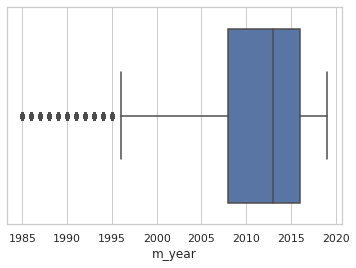

In [36]:
sns.boxplot(x = df.m_year);

In [37]:
print_outlier(df['m_year'])

number of outlier 4895 from 56138, about 8.72%


#### Mileage

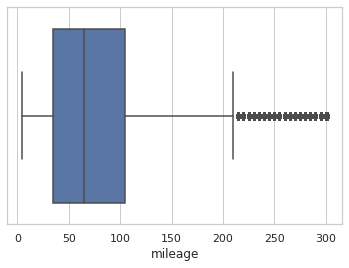

In [38]:
sns.boxplot(x = df.mileage);

In [39]:
print_outlier(df['mileage'])

number of outlier 2955 from 56138, about 5.26%


#### Price

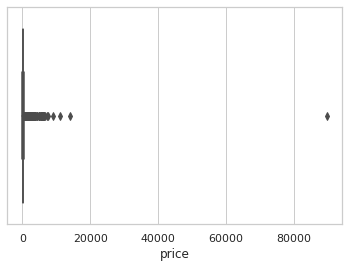

In [40]:
sns.boxplot(x = df.price);

In [41]:
print_outlier(df['price'])

number of outlier 847 from 56138, about 1.51%


dilihat dari plot, ada 1 data yang sangat outlier, maka lebih baik dihapus saja <br>

ada mobil dengan harga 89 miliar ???

In [42]:
df = df[df['price'] < 20000]

#### Price (2nd attempt)

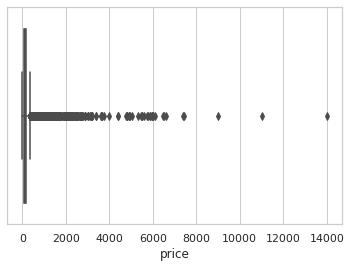

In [43]:
sns.boxplot(x = df.price);

In [44]:
print_outlier(df['price'])

number of outlier 1702 from 56137, about 3.03%


## 5. Correlation Heatmap

In [45]:
def plot_correlation_matrix(corr_matrix, size=(12, 12), y_lim=(15, 0)):
    plt.figure(figsize = size)
    
    ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    ax.set_ylim(y_lim[0], y_lim[1])
    
    return ax

In [46]:
exclude_corr = {
    'make', 'm_type', 'm_type_variant', 'region_id', 'city_id', 'district_id' # Tidak intuitif untuk categorical sebenarnya
}

plot_columns = sorted(set(df.columns) - exclude_corr)
correlation_matrix = df[plot_columns].corr()

Plot dibagi menjadi 16 table (tidak cukup)

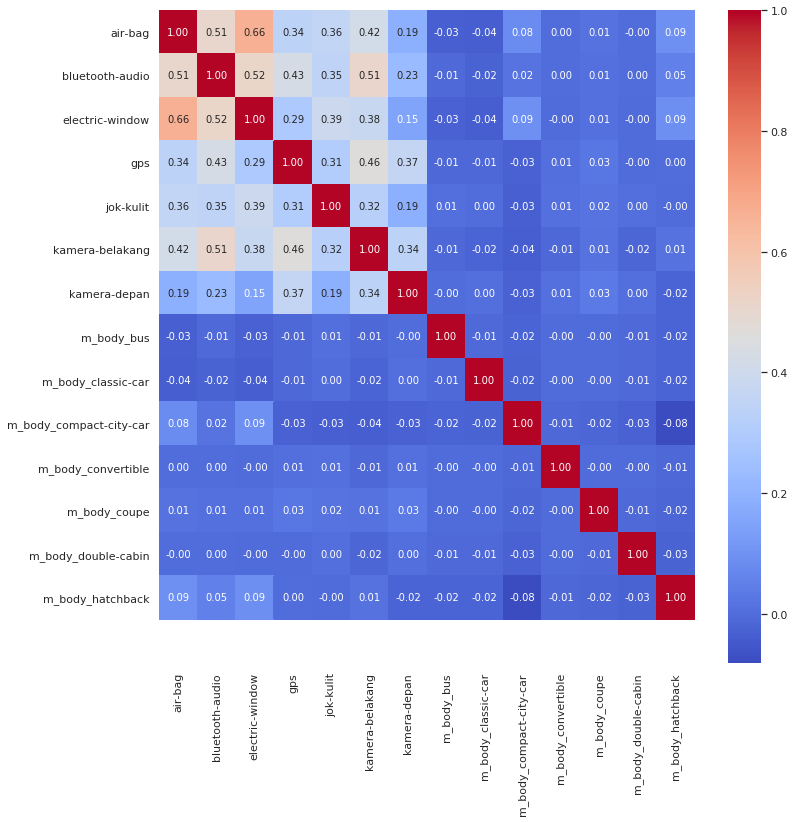

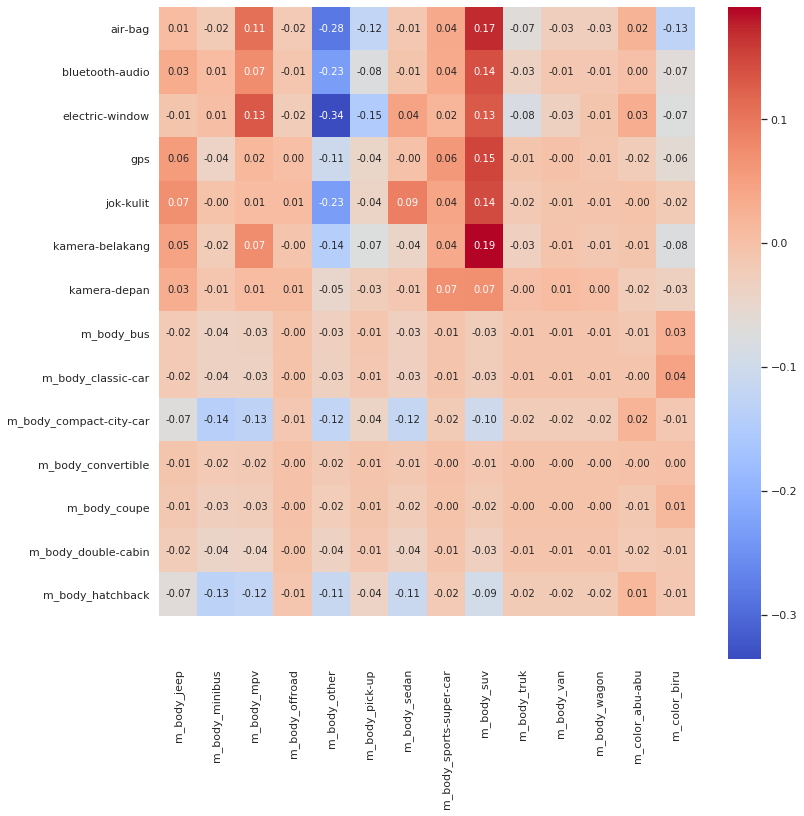

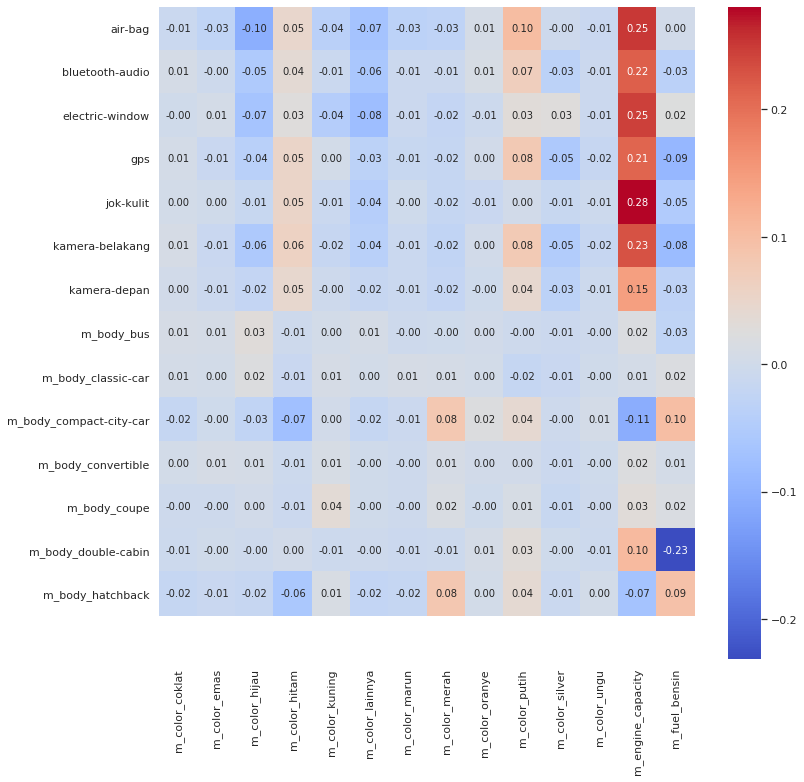

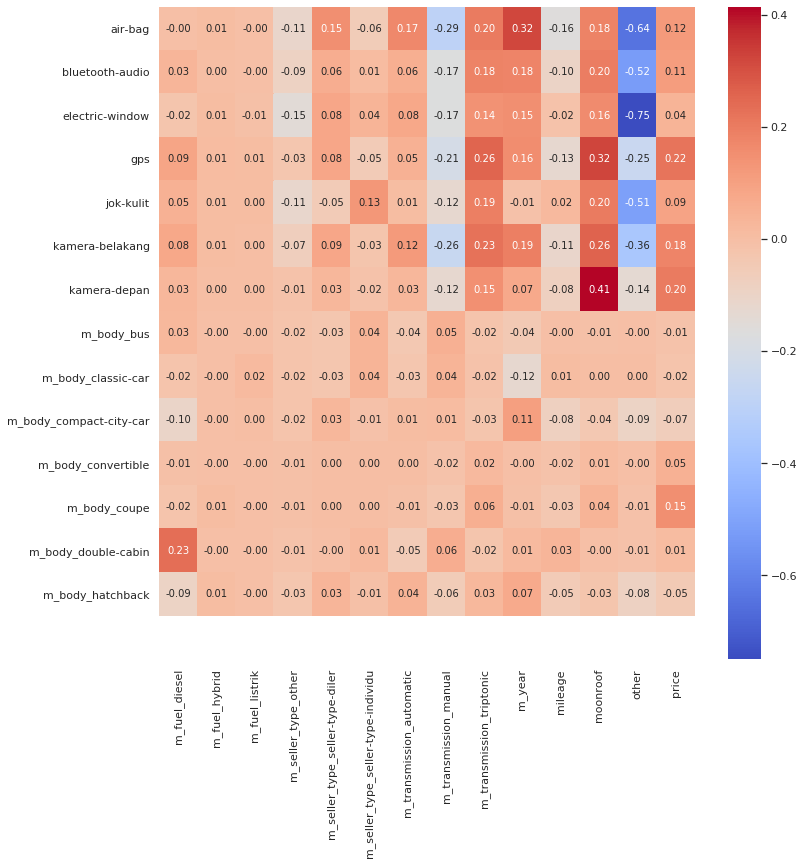

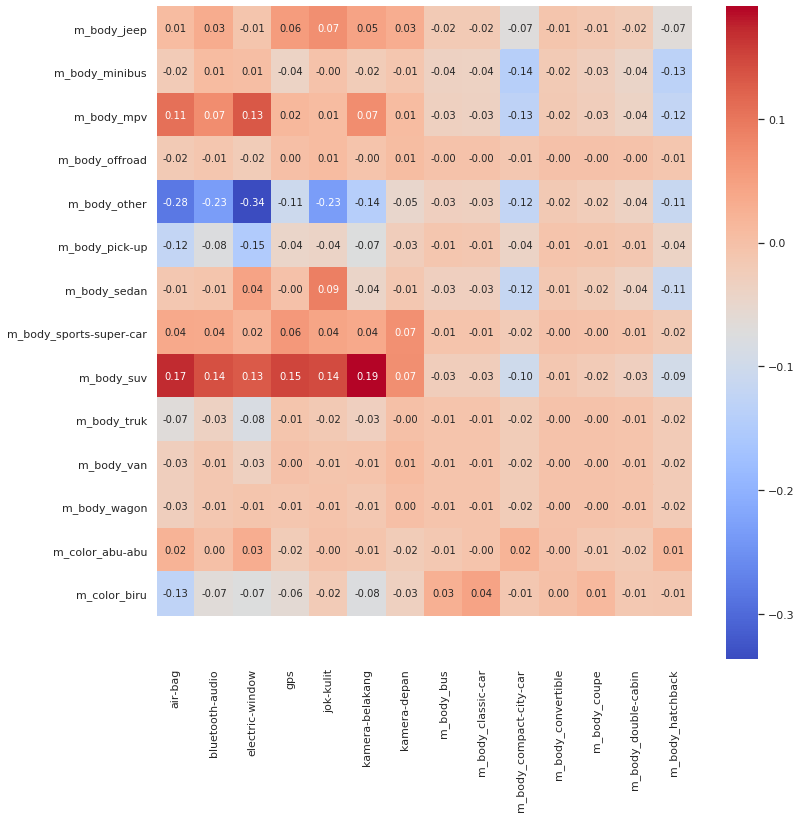

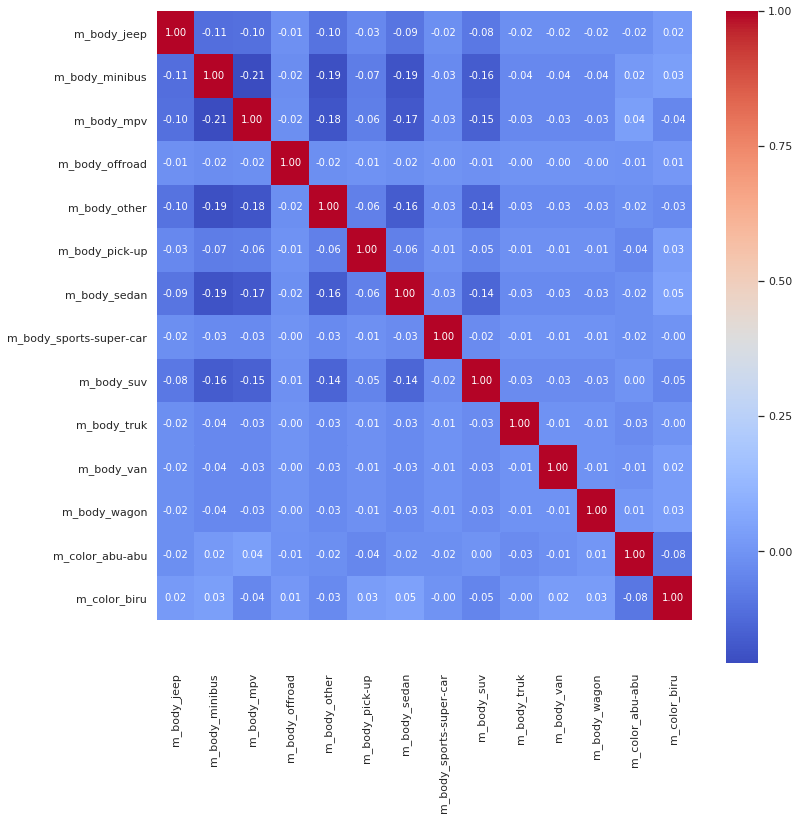

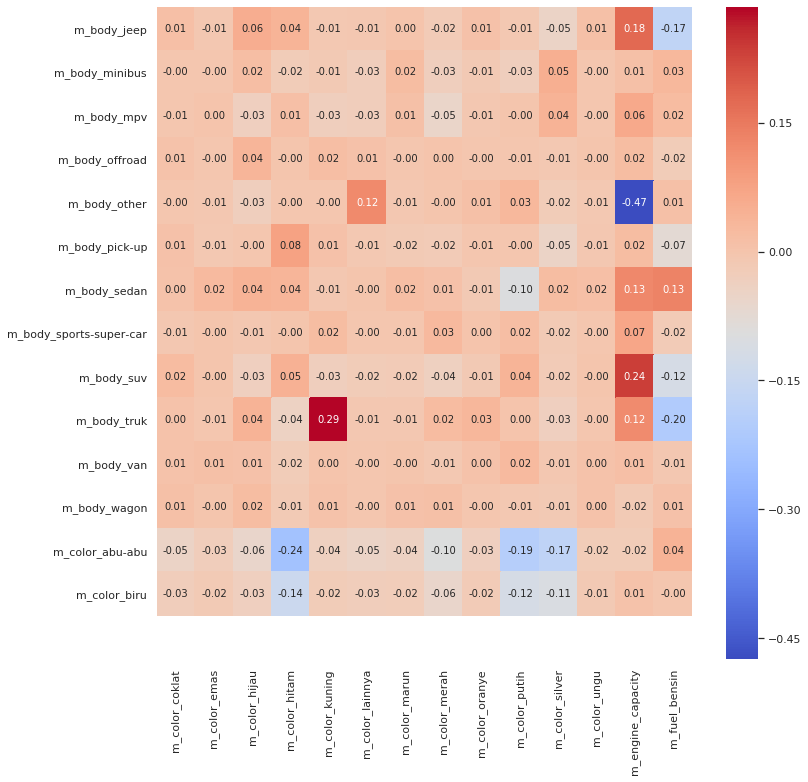

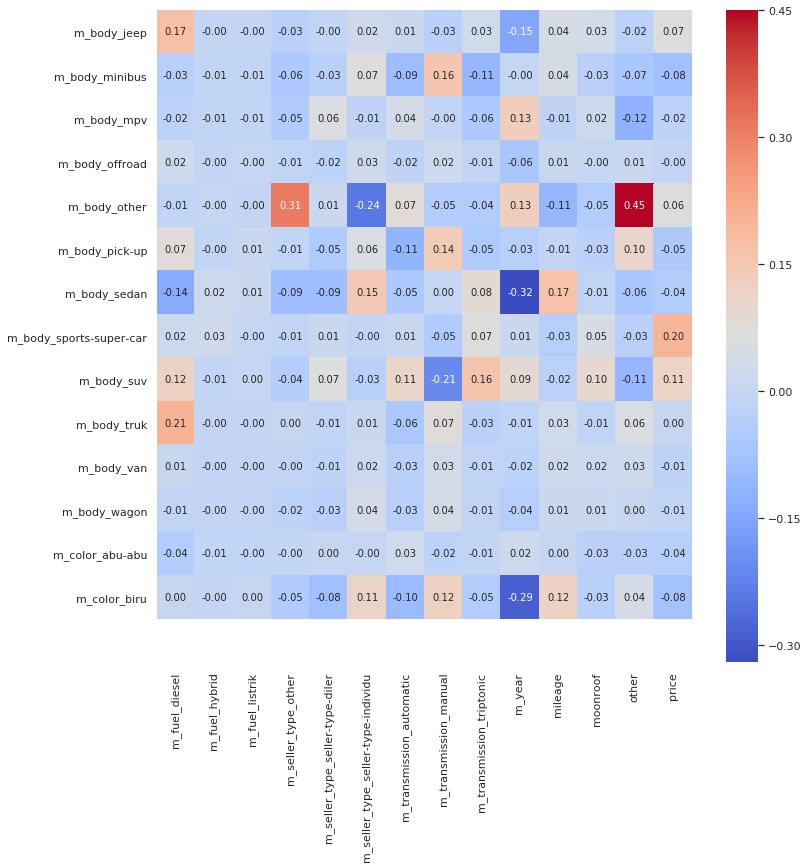

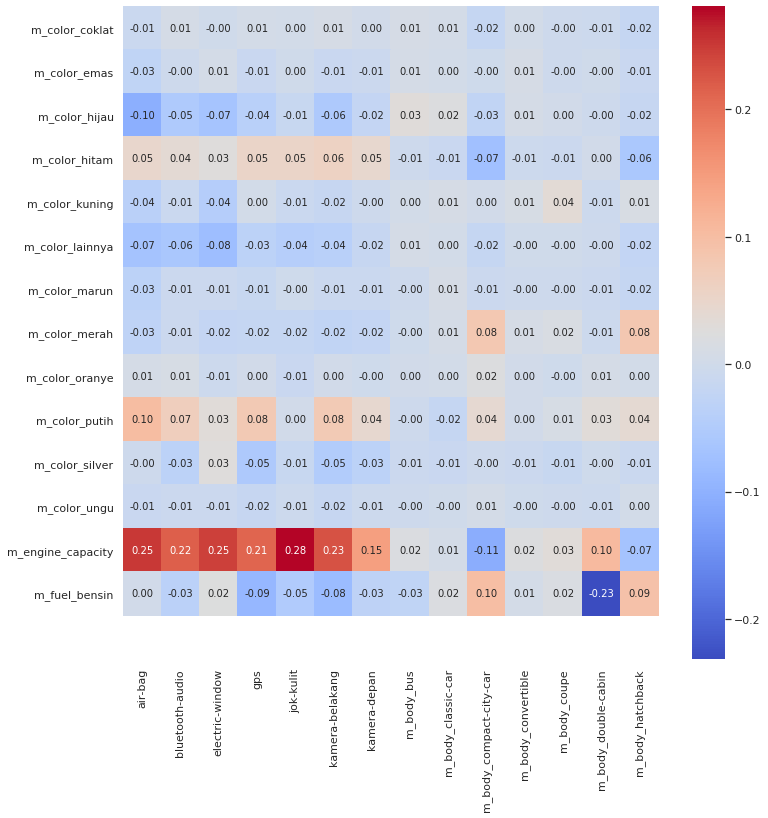

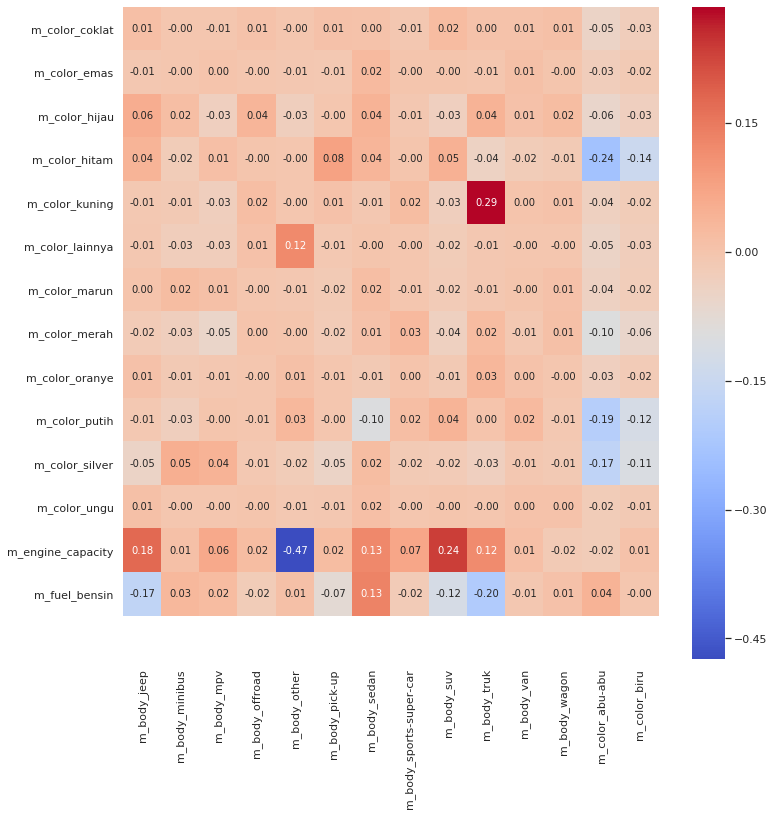

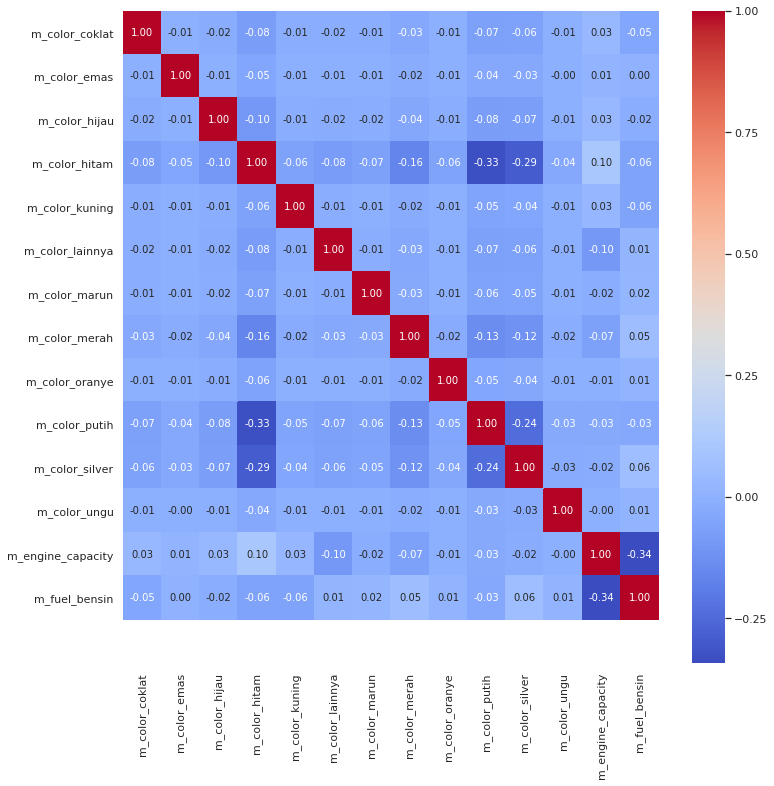

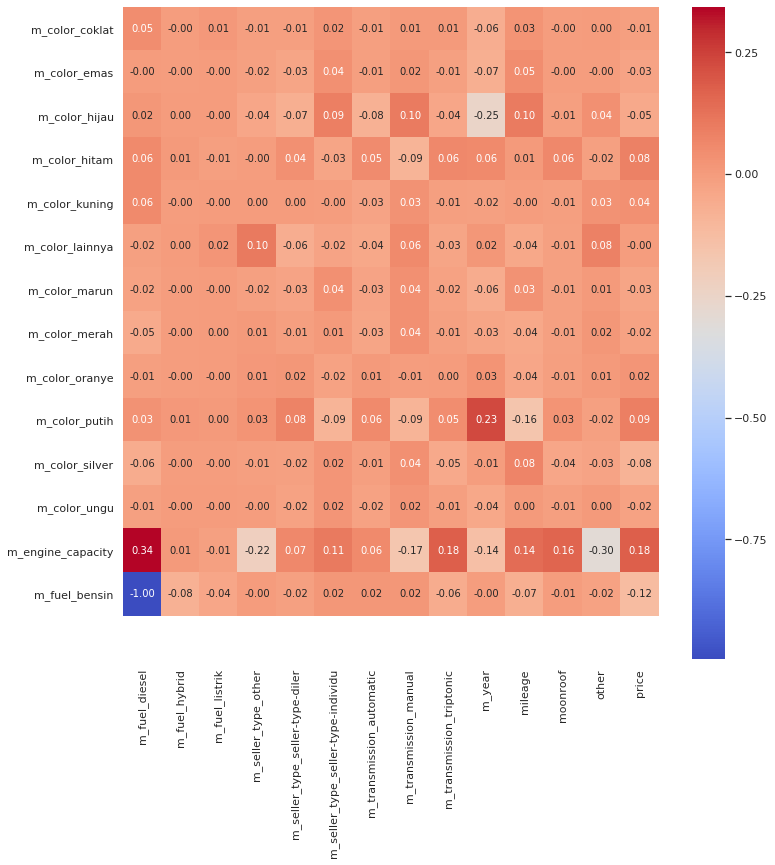

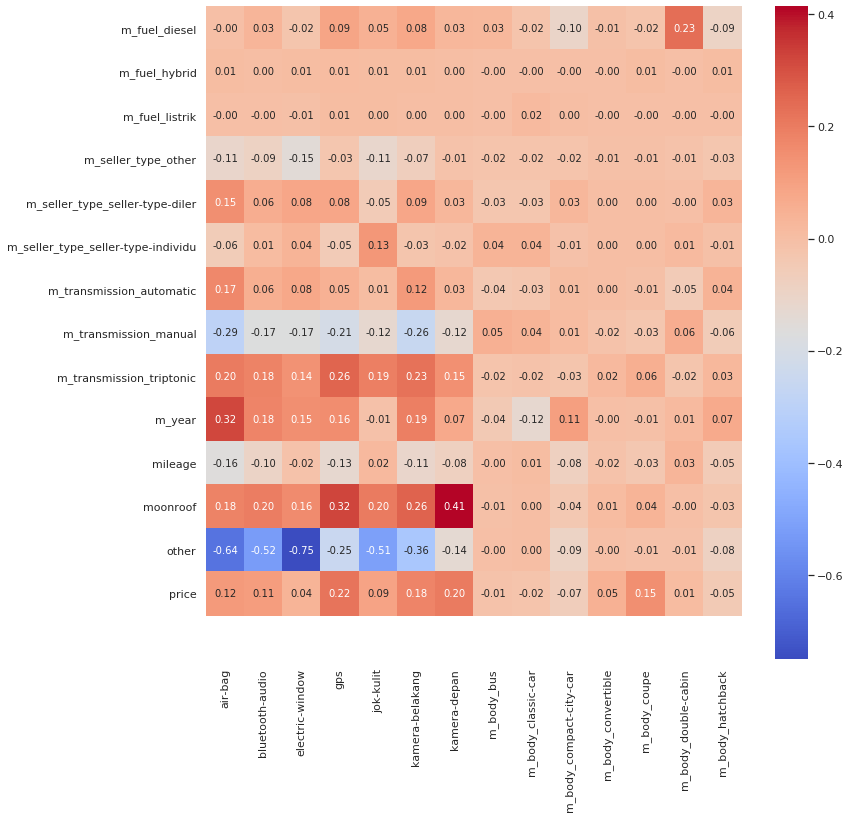

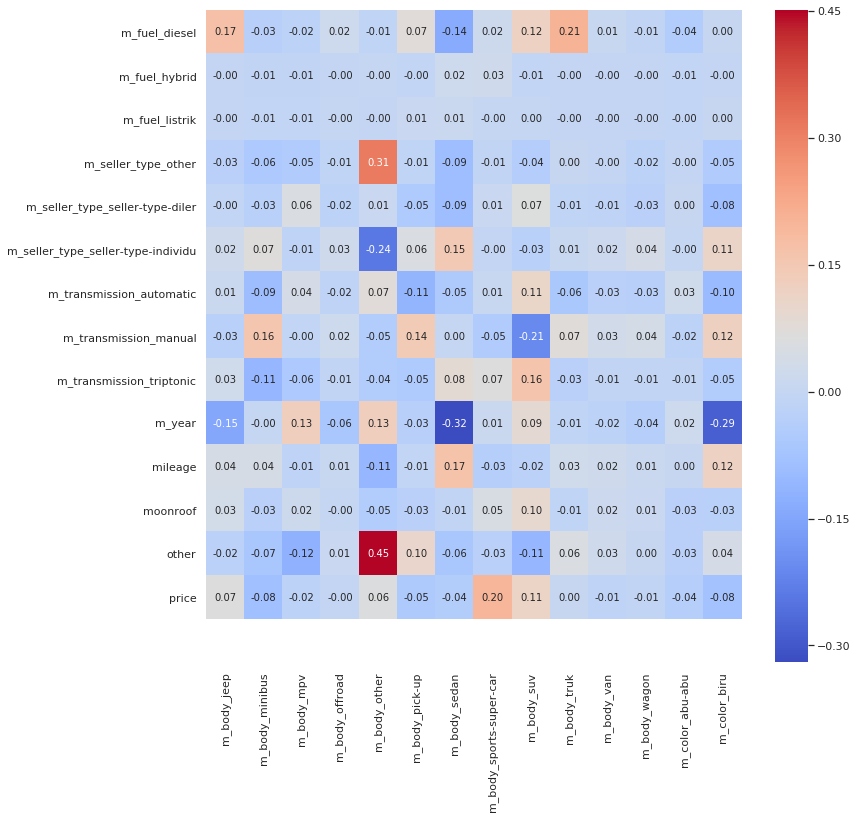

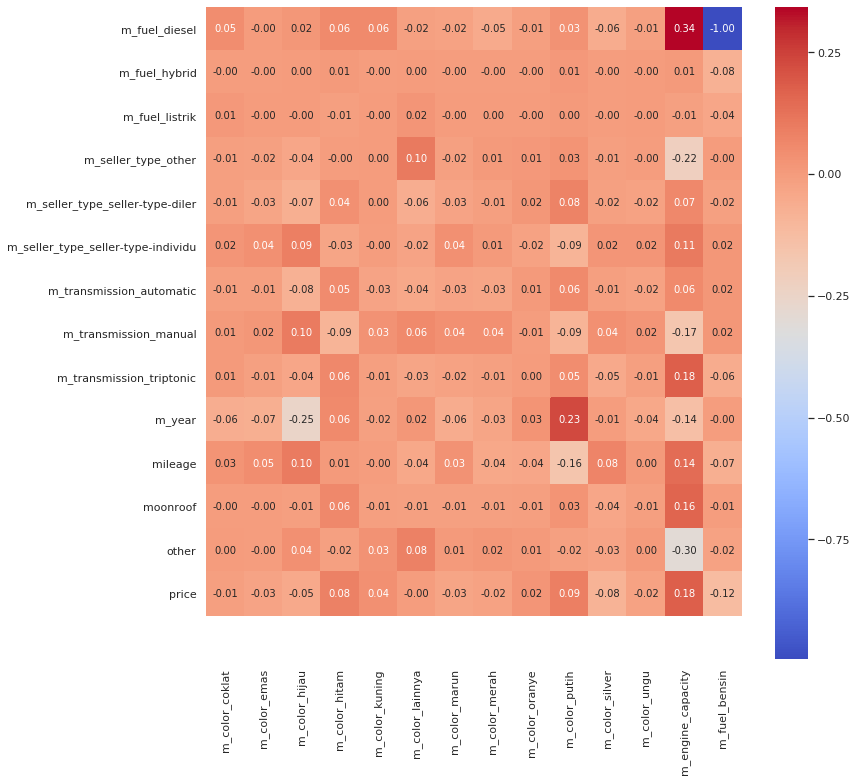

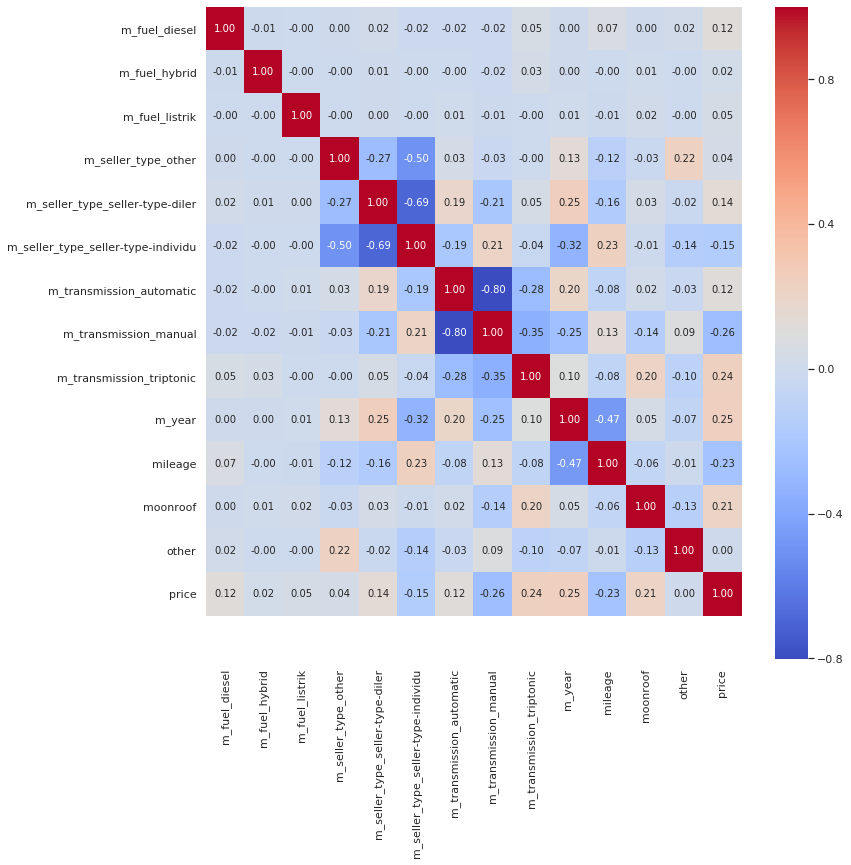

In [47]:
for i in range(0, 4):
    _start_row = (len(plot_columns) // 4) * i
    _end_row = (len(plot_columns) // 4) * (i + 1)
    for j in range(4):
        _start_col = (len(plot_columns) // 4) * j
        _end_col = (len(plot_columns) // 4) * (j + 1)
        
        matrix = correlation_matrix[_start_row:_end_row][plot_columns[_start_col:_end_col]]
        
        display(plot_correlation_matrix(matrix));

Berdasarkan plot plot diatas, bisa dicari fitur fitur yang mempengaruhi perubahan harga

## Alternate 6. Handle `make`, `m_variant`, `m_type_variant`

#### something's wrong with the index

In [48]:
df = df.reset_index()
df = df.drop(["index"], axis=1)

### 6.1 Outlier Analysis for choosen feature

**PS**<br>
`m_variant` sepertinya tidak bikin lebih baik, karena jumlah unique value yang besar akan menambah banyak fitur. Data juga menjadi sparse dan jumlah data per fitur one hotnya sedikit. => tidak baik (curse of dimensionality),, better pakai one hot sampai tahap `make` saja

In [49]:
df['make'].value_counts()

mobil-bekas-toyota                 18495
mobil-bekas-honda                  10054
mobil-bekas-daihatsu                6136
mobil-bekas-suzuki                  5013
mobil-bekas-nissan                  3667
mobil-bekas-mitsubishi              3266
mobil-bekas-mercedes-benz           1516
mobil-bekas-bmw                     1035
mobil-bekas-mazda                    986
mobil-bekas-chevrolet                738
mobil-bekas-isuzu                    722
mobil-bekas-hyundai                  676
mobil-bekas-kia                      637
mobil-bekas-ford                     636
mobil-bekas-datsun                   431
mobil-bekas-jeep                     266
mobil-bekas-volkswagen               234
mobil-bekas-lexus                    172
mobil-bekas-land-rover               156
mobil-bekas-mini-cooper              138
mobil-bekas-wuling                   129
mobil-bekas-peugeot                  121
mobil-bekas-timor                     99
mobil-bekas-proton                    93
mobil-bekas-pors

Ganti value mobil yang jumlah kecil (< 50) jadi mobil-bekas-lain-lain, <br>
* pemilihan threshold berdasarkan tabel `value_counts` diatas, (liat curve diminishnya)

alasan digabung jd other => jika sample dari class terlalu sedikit, menjadi noise untuk regresi<br>

In [50]:
df.loc[df.groupby('make').make.transform('count').lt(50), 'make'] = 'mobil-bekas-lain-lain'  

**alternative** 
*'apakah tipe lain-lain di drop ?'* <br>

* yes -> reduce variance, reduce error , but kinda overfit to dataset
* no -> ada class 'other' yang notabene mencampuradukan semua mobil yang rare, regresi bisa jadi makin ngaco

In [51]:
# TODO: think this!
# df = df[df["make"] != 'mobil-bekas-lain-lain']

In [52]:
# res = df.groupby(['make', 'm_year'])["price"]
# outlier_removed = df.copy()
# for name, group in res:
    
#     Q1 = group.quantile(0.25)
#     Q3 = group.quantile(0.75)
#     IQR = Q3 - Q1
    
#     temp = df[(df['make'] == name[0] ) & (df['m_year'] == name[1])]
    
#     try:
#         index_names = temp[(temp['price'] < (Q1 - 1.5 * IQR)) | (temp['price'] > (Q3 + 1.5 * IQR))].index
#         outlier_removed = outlier_removed.drop(index_names)
#         # indexNames = temp[(temp['price'] < 10000000)].index
#         # no_outlier = no_outlier.drop(indexNames)
#     except:
#         pass

In [53]:
# Drop outlier

df_no_outlier = df.copy()
dropped_idx = []

unique_makes = df.groupby(['make'])["price"]
for make, group in unique_makes:
    
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    
    temp = df[df['make'] == make]
    
    try:
        outlier = temp[(temp['price'] < (Q1 - 1.5 * IQR)) | (temp['price'] > (Q3 + 1.5 * IQR))]
        outlier_idx = outlier.index
        
        df_no_outlier = df_no_outlier.drop(outlier_idx)
        dropped_idx += list(outlier_idx)
        

        # indexNames = temp[(temp['price'] < 10000000)].index
        # no_outlier = no_outlier.drop(indexNames)
    except Exception as e:
        print(e)
        pass

Cek dulu sample outlier yang di drop 

In [54]:
was_outlier = df.iloc[dropped_idx]
was_outlier.head()

make                    m_type  \
48022  mobil-bekas-audi   mobil-bekas-audi-audia4   
52563  mobil-bekas-audi    mobil-bekas-audi-other   
52577  mobil-bekas-audi   mobil-bekas-audi-auditt   
52584  mobil-bekas-audi  mobil-bekas-audi-audi_s6   
52664  mobil-bekas-audi   mobil-bekas-audi-auditt   

                    m_type_variant  m_year  mileage  m_engine_capacity  \
48022         audi-audia4-66415-20    2017       25                  4   
52563             audi-other-other    2016       25                  5   
52577  audi-auditt-66454-20-s-tfsi    2015        5                  3   
52584           audi-audi_s6-other    2014       30                  5   
52664  audi-auditt-66454-20-s-tfsi    2015       20                  3   

        price  air-bag  bluetooth-audio  electric-window  gps  jok-kulit  \
48022   795.0        1                1                1    1          1   
52563  1300.0        1                1                1    0          1   
52577  1150.0        1                1                1    0          1   
52584  1150.0        1                1                1    1          1   
52664  1125.0        0                0                0    0          0   

       kamera-belakang  kamera-depan  moonroof  other  sensor-parkir  sunroof  \
48022                1             0         0      0              0        0   
52563                1             0         0      0              1        1   
52577                0             0         0      0              1        0   
52584                1             1         1      0              1        1   
52664                0             0         0      1              0        0   

       m_transmission_automatic  m_transmission_manual  \
48022                         1                      0   
52563                         1                      0   
52577                         1                      0   
52584                         0                      0   
52664                         0                      0   

       m_transmission_triptonic  m_fuel_bensin  m_fuel_diesel  m_fuel_hybrid  \
48022                         0              1              0              0   
52563                         0              1              0              0   
52577                         0              1              0              0   
52584                         1              1              0              0   
52664                         1              1              0              0   

       m_fuel_listrik  m_body_bus  m_body_classic-car  \
48022               0           0                   0   
52563               0           0                   0   
52577               0           0                   0   
52584               0           0                   0   
52664               0           0                   0   

       m_body_compact-city-car  m_body_convertible  m_body_coupe  \
48022                        0                   0             0   
52563                        0                   0             0   
52577                        0                   0             1   
52584                        0                   0             0   
52664                        0                   0             1   

       m_body_double-cabin  m_body_hatchback  m_body_jeep  m_body_minibus  \
48022                    0                 0            0               0   
52563                    0                 0            0               0   
52577                    0                 0            0               0   
52584                    0                 0            0               0   
52664                    0                 0            0               0   

       m_body_mpv  m_body_offroad  m_body_other  m_body_pick-up  m_body_sedan  \
48022           0               0             0               0             1   
52563           0               0             0               0             1   
52577           0      

Ok, looks good,<br>
Next, cek juga jumlah outlier yang di buang dari masing - masing `make`

In [55]:
_temp = pd.DataFrame([df['make'].value_counts(), df_no_outlier['make'].value_counts()], index=["before", "after"]).T
_temp["diff"] = _temp["before"] - _temp["after"]
_temp["outlier %"] = _temp["diff"] / _temp["before"]

display(_temp)
display(_temp.describe())

before  after  diff  outlier %
mobil-bekas-toyota          18495  17101  1394   0.075372
mobil-bekas-honda           10054   9664   390   0.038791
mobil-bekas-daihatsu         6136   5765   371   0.060463
mobil-bekas-suzuki           5013   4985    28   0.005585
mobil-bekas-nissan           3667   3279   388   0.105809
mobil-bekas-mitsubishi       3266   3251    15   0.004593
mobil-bekas-mercedes-benz    1516   1446    70   0.046174
mobil-bekas-bmw              1035   1006    29   0.028019
mobil-bekas-mazda             986    949    37   0.037525
mobil-bekas-chevrolet         738    701    37   0.050136
mobil-bekas-isuzu             722    678    44   0.060942
mobil-bekas-hyundai           676    610    66   0.097633
mobil-bekas-kia               637    598    39   0.061224
mobil-bekas-ford              636    551    85   0.133648
mobil-bekas-lain-lain         499    420    79   0.158317
mobil-bekas-datsun            431    392    39   0.090487
mobil-bekas-jeep              266    260     6   0.022556
mobil-bekas-volkswagen        234    219    15   0.064103
mobil-bekas-lexus             172    168     4   0.023256
mobil-bekas-land-rover        156    151     5   0.032051
mobil-bekas-mini-cooper       138    137     1   0.007246
mobil-bekas-wuling            129    127     2   0.015504
mobil-bekas-peugeot           121    108    13   0.107438
mobil-bekas-timor              99     98     1   0.010101
mobil-bekas-porsche            93     81    12   0.129032
mobil-bekas-proton             93     89     4   0.043011
mobil-bekas-audi               70     58    12   0.171429
mobil-bekas-hino               59     55     4   0.067797

before         after         diff  outlier %
count     28.000000     28.000000    28.000000  28.000000
mean    2004.892857   1890.964286   113.928571   0.062437
std     3966.846059   3710.266702   275.759816   0.046543
min       59.000000     55.000000     1.000000   0.004593
25%      135.750000    134.500000     5.750000   0.026828
50%      567.500000    485.500000    28.500000   0.055299
75%     1155.250000   1116.000000    67.000000   0.092274
max    18495.000000  17101.000000  1394.000000   0.171429

Jumlah outlier yang dibuang relatif masih 'acceptable'

### 6.2 Remove and OHE Features

In [56]:
df = df.join(pd.get_dummies(df['make']))
# df = df.join(pd.get_dummies(df['m_type']))

In [57]:
df_no_outlier = df_no_outlier.join(pd.get_dummies(df_no_outlier['make']))
# df = df.join(pd.get_dummies(df['m_type']))

In [58]:
df = df.drop(["make", "m_type", "m_type_variant"], axis=1)

In [59]:
df_no_outlier = df_no_outlier.drop(["make", "m_type", "m_type_variant"], axis=1)

### Check All features

In [60]:
df.head()

m_year  mileage  m_engine_capacity  price  air-bag  bluetooth-audio  \
0    2014       70                  2  118.0        1                0   
1    2015       50                  0  118.0        0                0   
2    2014       40                  2  118.0        1                0   
3    2013       50                  2  119.0        0                0   
4    2011      110                  2  118.0        0                1   

   electric-window  gps  jok-kulit  kamera-belakang  kamera-depan  moonroof  \
0                1    0          1                0             0         0   
1                0    0          0                0             0         0   
2                1    0          1                0             0         0   
3                0    0          0                0             0         0   
4                1    1          0                1             0         0   

   other  sensor-parkir  sunroof  m_transmission_automatic  \
0      0              1        0                         1   
1      1              0        0                         1   
2      0              1        0                         1   
3      1              0        0                         0   
4      0              1        0                         0   

   m_transmission_manual  m_transmission_triptonic  m_fuel_bensin  \
0                      0                         0              1   
1                      0                         0              1   
2                      0                         0              1   
3                      1                         0              1   
4                      1                         0              1   

   m_fuel_diesel  m_fuel_hybrid  m_fuel_listrik  m_body_bus  \
0              0              0               0           0   
1              0              0               0           0   
2              0              0               0           0   
3              0              0               0           0   
4              0              0               0           0   

   m_body_classic-car  m_body_compact-city-car  m_body_convertible  \
0                   0                        0                   0   
1                   0                        0                   0   
2                   0                        0                   0   
3                   0                        0                   0   
4                   0                        0                   0   

   m_body_coupe  m_body_double-cabin  m_body_hatchback  m_body_jeep  \
0             0                    0                 0            0   
1             0                    0                 0            0   
2             0                    0                 0            0   
3             0                    0                 0            0   
4             0                    0                 0            0   

   m_body_minibus  m_body_mpv  m_body_offroad  m_body_other  m_body_pick-up  \
0               0           1               0             0               0   
1               0           0               0             1               0   
2               1           0               0             0               0   
3               0           1               0             0               0   
4               1           0               0             0               0   

   m_body_sedan  m_body_sports-super-car  m_body_suv  m_body_truk  m_body_van  \
0             0                        0           0            0           0   
1             0                        0           0            0           0   
2             0                        0           0            0           0   
3             0                        0           0            0           0   
4             0                        0           0            0           0   

   m_body_wagon  m_seller_type_other  m_seller_type_seller-type-diler  \
0             0                  

In [61]:
len(df.columns)

86

In [62]:
len(df_no_outlier.columns)

86

Ganti df dengan df_no_outlier

In [63]:
df_with_outlier = df.copy()
df = df_no_outlier.copy()

## 7. Training Model

Dalam melakukan training, digunakan 2 cost utama:<br>
* **Root Mean Squared Error (L2)** 
    RMSE baik digunakan jika data relatif bersih dari outlier, model dilatih lebih strict (punishment secara kuadratik) untuk fit terhadap data.
* **Mean Absolute Error (L1)**
    MAE lebih baik digunakan jika data mengandung outlier, model lebih robust, karena cenderung mengabaikan outlier.

### Function

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tqdm import tqdm


def generate_result_metrics(metrics, results):
    columns, data = [], []
    for metric in metrics:
        if "_time" not in metric:
            columns.append(metric)
            data.append(results[metric])
    
    data = np.array(data).T.tolist()
    metrics = pd.DataFrame(data, columns=columns)
    return metrics.astype(float)


def cross_val_results(regressor, X, y, fold=10):
    cv_results = {
        "Mean Square Error": [],
        "Root Mean Square Error": [],
        "Mean Absolute Error": []
    }

    cv = KFold(n_splits=10, random_state=42, shuffle=False)
    for train_index, test_index in tqdm(cv.split(df)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index], 
        y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
        
        model = regressor.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        
        cv_results["Mean Square Error"].append('{0:.10f}'.format(mse))
        cv_results["Root Mean Square Error"].append('{0:.10f}'.format(rmse))
        cv_results["Mean Absolute Error"].append('{0:.10f}'.format(mae))
    
    return cv_results

def generate_df_result(y_pred, y_test):
    df_pred = pd.DataFrame(y_pred)
    _y_test = y_test.reset_index().drop(['index'], axis=1)
    df_result = pd.concat([df_pred, _y_test], axis=1, ignore_index=True)
    df_result.columns = ["predict", "truth"]
    
    df_result['index'] = range(0, df_result.shape[0])
    
    return df_result


def show_graph_truth_prediction(df_result, start=8500, end=8700):
    sorted_result = df_result.sort_values(by=['truth'])

    ax1 = sorted_result[start:end].plot(kind='scatter', x='index', y='predict', color='r', figsize=(20, 8))    
    ax2 = sorted_result[start:end].plot(kind='scatter', x='index', y='truth', color='g', ax=ax1)    
    ax1.legend(['predict', 'truth'])

    display(ax1)
    

def show_graph_comparison(df_result1, df_result2, start=8500, end=8700):
    sorted_result = df_result1.sort_values(by=['truth'])
    sorted_result2 = df_result2.sort_values(by=['truth'])

    ax1 = sorted_result[start:end].plot(kind='scatter', x='index', y='predict', color='r', figsize=(20, 8))    
    ax2 = sorted_result2[start:end].plot(kind='scatter', x='index', y='predict', color='b', ax=ax1)    
    ax3 = sorted_result2[start:end].plot(kind='scatter', x='index', y='truth', color='g', ax=ax1)    
    ax1.legend(['predict with categorical', 'predict without categorical', 'truth'])

    display(ax1)

In [65]:
# Create a global dictionary to store all result

RESULT = {}

### 7.1 Prepare split

In [66]:
df_target = pd.DataFrame(df['price'])
df = df.drop(['price'], axis=1)

In [67]:
from sklearn.model_selection import train_test_split, cross_validate, KFold

X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.2, random_state=42)

In [68]:
display(X_train.shape)
display(X_test.shape)

(42357, 85)

(10590, 85)

### 7.2 LinearRegression

In [69]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [70]:
cv_results = cross_val_results(regressor, df, df_target)

10it [00:05,  1.58it/s]


In [71]:
sorted_metrics = sorted(cv_results.keys())

metrics = generate_result_metrics(sorted_metrics, cv_results)
RESULT["Linear Regression no Outlier"] = metrics
display(metrics)
display(metrics.describe())

Mean Absolute Error  Mean Square Error  Root Mean Square Error
0            36.808380        3534.795299               59.454145
1            34.452224        2439.662631               49.392941
2            45.990216        7973.027009               89.291808
3            33.007766        2725.581446               52.207101
4            41.922604        3969.478278               63.003796
5            33.537171        2917.281497               54.011864
6            36.150896        3028.558406               55.032340
7            36.633733        2850.268605               53.387907
8            68.017561       15860.653023              125.939085
9            69.510408       39860.971307              199.652126

Mean Absolute Error  Mean Square Error  Root Mean Square Error
count            10.000000          10.000000               10.000000
mean             43.603096        8516.027750               80.137311
std              13.837851       11767.366519               48.235984
min              33.007766        2439.662631               49.392941
25%              34.876892        2867.021828               53.543896
50%              36.721057        3281.676852               57.243242
75%              44.973313        6972.139826               82.719805
max              69.510408       39860.971307              199.652126

In [72]:
model = regressor.fit(X_train, y_train.values.ravel())

y_linear_pred = model.predict(X_test)

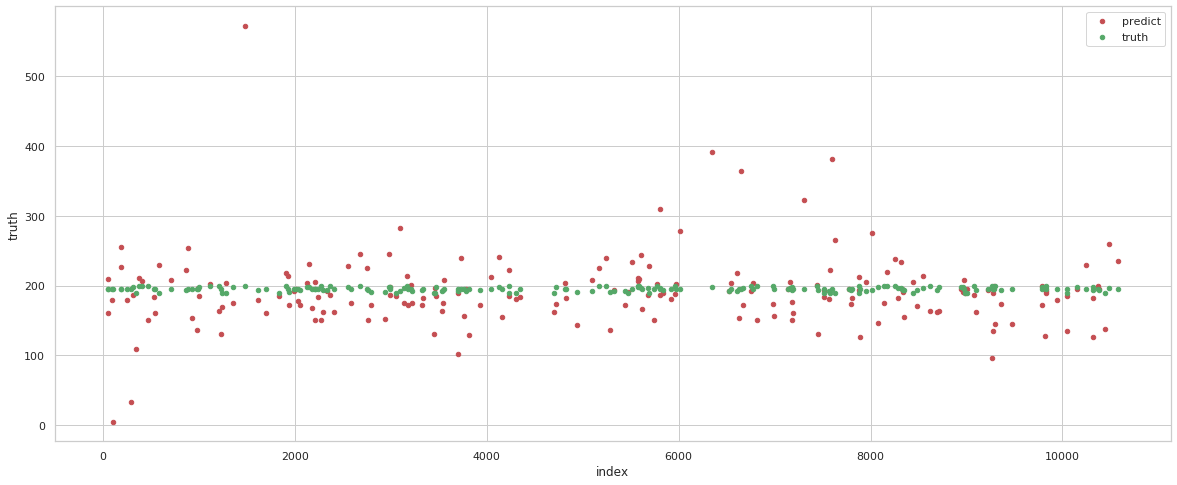

In [73]:
df_linear_result = generate_df_result(y_linear_pred, y_test)

show_graph_truth_prediction(df_linear_result)

### 7.3 Polynomial Regression

NOT FINISHED, CAN'T

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# polynomial_features = PolynomialFeatures(degree=2)
# df_poly = polynomial_features.fit_transform(df)
# regressor = LinearRegression()

In [75]:
# cv_results = cross_val_results(regressor, df_poly, df_target)

In [76]:
# sorted_metrics = sorted(cv_results.keys())

# metrics = generate_result_metrics(sorted_metrics, cv_results)
# metrics

In [77]:
# model = regressor.fit(X_train, y_train)

# y_poly_pred = model.predict(X_test)

In [78]:
# df_poly_result = generate_df_result(y_poly_pred, y_test)

# show_graph_truth_prediction(df_poly_result)

### 7.4 RandomForest

In [79]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

In [80]:
cv_results = cross_val_results(regressor, df, df_target)

0it [00:00, ?it/s]/home/jessinra/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
10it [00:47,  4.68s/it]


In [81]:
sorted_metrics = sorted(cv_results.keys())

metrics = generate_result_metrics(sorted_metrics, cv_results)
RESULT["Random Forest no Outlier"] = metrics
display(metrics)
display(metrics.describe())

Mean Absolute Error  Mean Square Error  Root Mean Square Error
0            22.914485        1762.834950               41.986128
1            18.087292         699.398994               26.446153
2            34.019260        6681.976197               81.743356
3            18.578912         841.582887               29.010048
4            31.000415        2669.449466               51.666715
5            18.150794        1629.788583               40.370640
6            23.139184        1341.282063               36.623518
7            21.406736        1226.674618               35.023915
8            44.467620        8999.167109               94.863940
9            53.942286       33282.716113              182.435512

Mean Absolute Error  Mean Square Error  Root Mean Square Error
count            10.000000          10.000000               10.000000
mean             28.570698        5913.487098               62.016992
std              12.306947       10005.946327               47.927952
min              18.087292         699.398994               26.446153
25%              19.285868        1255.326479               35.423816
50%              23.026834        1696.311767               41.178384
75%              33.264548        5678.844514               74.224196
max              53.942286       33282.716113              182.435512

In [82]:
model = regressor.fit(X_train, y_train.values.ravel())

y_random_forest_pred = model.predict(X_test)

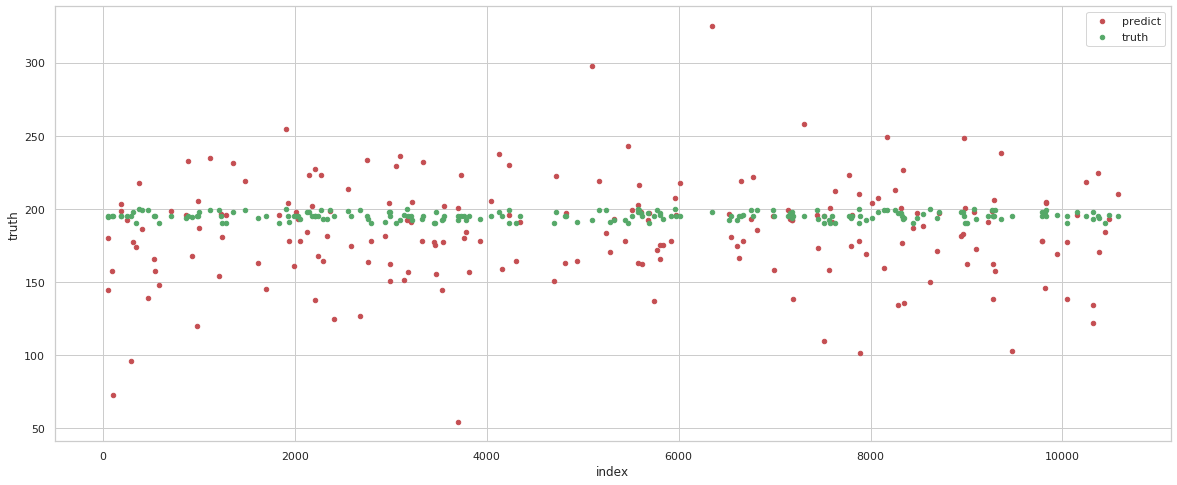

In [83]:
df_random_forest_result = generate_df_result(y_random_forest_pred, y_test)

show_graph_truth_prediction(df_random_forest_result)

### 7.5 XGBoost

In [84]:
from xgboost import XGBRegressor

regressor = XGBRegressor()

In [85]:
cv_results = cross_val_results(regressor, df, df_target)

0it [00:00, ?it/s]

[16:50:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1it [00:08,  8.86s/it]

[16:50:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


2it [00:17,  8.80s/it]

[16:50:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


3it [00:26,  8.76s/it]

[16:51:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


4it [00:34,  8.71s/it]

[16:51:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


5it [00:43,  8.67s/it]

[16:51:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


6it [00:51,  8.64s/it]

[16:51:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


7it [01:01,  8.79s/it]

[16:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


8it [01:09,  8.83s/it]

[16:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


9it [01:19,  9.02s/it]

[16:51:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


10it [01:30,  9.53s/it]


In [86]:
sorted_metrics = sorted(cv_results.keys())

metrics = generate_result_metrics(sorted_metrics, cv_results)
RESULT["XGBoost no Outlier"] = metrics
display(metrics)
display(metrics.describe())

Mean Absolute Error  Mean Square Error  Root Mean Square Error
0            30.028639        2137.485382               46.232947
1            23.520699        1007.711040               31.744465
2            35.300433        4406.406943               66.380772
3            23.735066        1125.172873               33.543597
4            38.437199        3195.038610               56.524673
5            22.287477        1453.552787               38.125487
6            30.936399        1928.387484               43.913409
7            28.211805        1741.890784               41.735965
8            47.920865        8456.021356               91.956628
9            62.210712       37144.670507              192.729527

Mean Absolute Error  Mean Square Error  Root Mean Square Error
count            10.000000          10.000000               10.000000
mean             34.258929        6259.633777               64.288747
std              12.567032       11079.216803               48.609450
min              22.287477        1007.711040               31.744465
25%              24.854251        1525.637287               39.028107
50%              30.482519        2032.936433               45.073178
75%              37.653007        4103.564860               63.916747
max              62.210712       37144.670507              192.729527

In [87]:
model = regressor.fit(X_train, y_train.values.ravel())

y_xgb_pred = model.predict(X_test)

[16:52:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


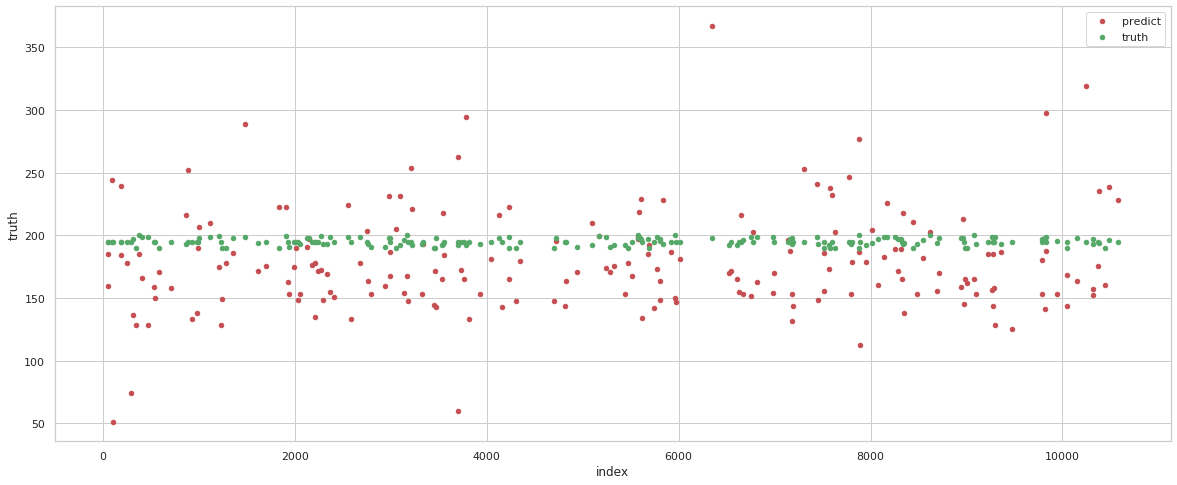

In [88]:
df_xgb_result = generate_df_result(y_xgb_pred, y_test)

show_graph_truth_prediction(df_xgb_result)

### 7.6 NN

In [89]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers.core import Dropout
from keras.layers.core import Dense

import warnings
warnings.filterwarnings("once")

Using TensorFlow backend.
/home/jessinra/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jessinra/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jessinra/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jessinra/.local/lib/python3.6/site-packages/tensorflo

In [90]:
from keras.callbacks import Callback
from IPython.display import clear_output

class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        
        plt.show();
        
plot = PlotLearning()

In [91]:
model_nn = Sequential()
model_nn.add(Dense(16, kernel_initializer='normal', input_dim=X_train.shape[1], activation="relu"))
model_nn.add(Dense(16, kernel_initializer='normal', activation="relu"))
model_nn.add(Dense(8, kernel_initializer='normal', activation="relu"))
model_nn.add(Dense(8, kernel_initializer='normal', activation="relu"))
model_nn.add(Dense(1, kernel_initializer='normal', activation="linear"))

model_nn.compile(loss="mean_absolute_error", 
                 optimizer="adam",
                 metrics=['mean_absolute_error'])

W1110 16:52:22.751812 140290367780672 deprecation_wrapper.py:119] From /home/jessinra/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1110 16:52:22.772037 140290367780672 deprecation_wrapper.py:119] From /home/jessinra/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1110 16:52:22.774691 140290367780672 deprecation_wrapper.py:119] From /home/jessinra/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4409: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W1110 16:52:22.895037 140290367780672 deprecation_wrapper.py:119] From /home/jessinra/.local/lib/python3.6/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [92]:
model_nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1376      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 1,865
Trainable params: 1,865
Non-trainable params: 0
_________________________________________________________________


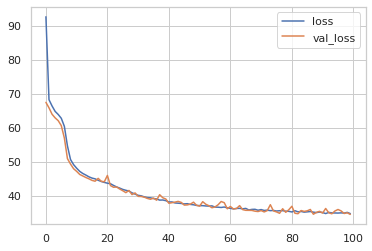

In [93]:
model_nn.fit(X_train, y_train,
            validation_split=0.2,
            epochs=100,
            batch_size=128,
            callbacks=[plot],
            verbose=1)

In [94]:
y_nn_pred = model_nn.predict(X_test)

mse = mean_squared_error(y_test, y_nn_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_nn_pred)

print("Mean Squared Error: {0:.10f}".format(mse))
print("Root Mean Squared Error: {0:.10f}".format(rmse))
print("Mean Absolute Error: {0:.10f}".format(mae))

Mean Squared Error: 5544.1604907180
Root Mean Squared Error: 74.4591195940
Mean Absolute Error: 35.4275489910


In [95]:
metrics = pd.DataFrame([mae, mse, rmse], index=['Mean Absolute Error', 'Mean Square Error', 'Root Mean Square Error']).T
RESULT["NN no Outlier"] = metrics
display(metrics)

Mean Absolute Error  Mean Square Error  Root Mean Square Error
0            35.427549        5544.160491                74.45912

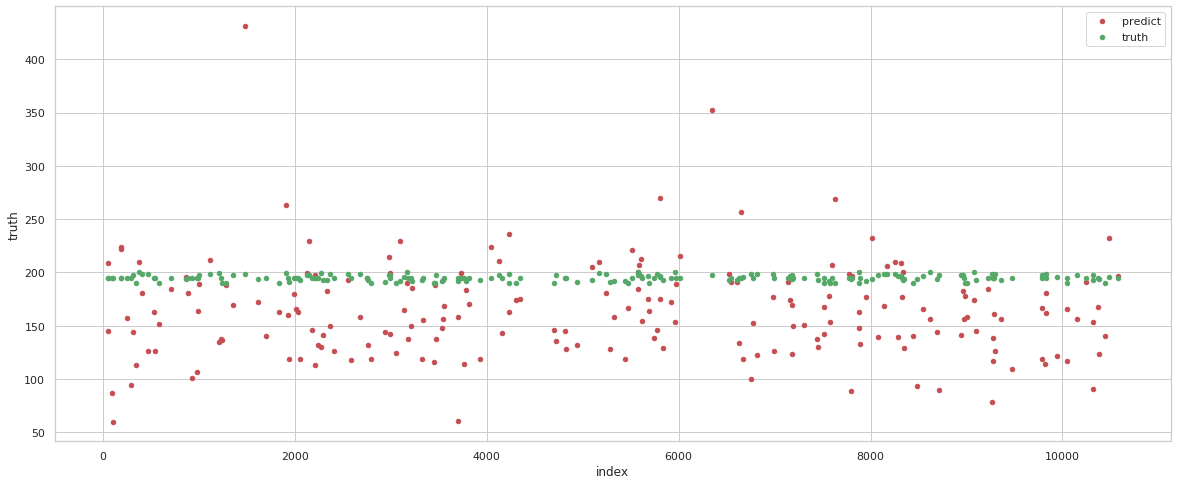

In [96]:
df_nn_result = generate_df_result(y_nn_pred, y_test)

show_graph_truth_prediction(df_nn_result)

## 8. Training incl. outliers

In [97]:
df = df_with_outlier

### 8.1 Prepare split

In [98]:
df_target = pd.DataFrame(df['price'])
df = df.drop(['price'], axis=1)

In [99]:
from sklearn.model_selection import train_test_split, cross_validate, KFold

X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.2, random_state=42)

In [100]:
display(X_train.shape)
display(X_test.shape)

(44909, 85)

(11228, 85)

### 8.2 LinearRegression

In [101]:
regressor = LinearRegression()

In [102]:
cv_results = cross_val_results(regressor, df, df_target)

10it [00:07,  1.28it/s]


In [103]:
sorted_metrics = sorted(cv_results.keys())

metrics = generate_result_metrics(sorted_metrics, cv_results)
RESULT["Linear Regression with Outlier"] = metrics
display(metrics)
display(metrics.describe())

Mean Absolute Error  Mean Square Error  Root Mean Square Error
0            56.656111        8599.217136               92.731964
1            56.442200        8741.649230               93.496787
2            65.695680       14800.890655              121.658911
3            50.904340        6963.832267               83.449579
4            54.112198        8114.005342               90.077774
5            52.239659        7438.151957               86.244721
6            49.019386        6340.439256               79.626875
7            58.720075        9222.523300               96.033970
8            92.980448       26010.466947              161.277608
9           182.256435      364757.193783              603.951317

Mean Absolute Error  Mean Square Error  Root Mean Square Error
count            10.000000          10.000000               10.000000
mean             71.902653       46098.836987              150.854951
std              40.789060      112119.812242              161.043889
min              49.019386        6340.439256               79.626875
25%              52.707794        7607.115303               87.202984
50%              56.549156        8670.433183               93.114376
75%              63.951779       13406.298816              115.252676
max             182.256435      364757.193783              603.951317

In [104]:
model = regressor.fit(X_train, y_train.values.ravel())

y_linear_pred = model.predict(X_test)

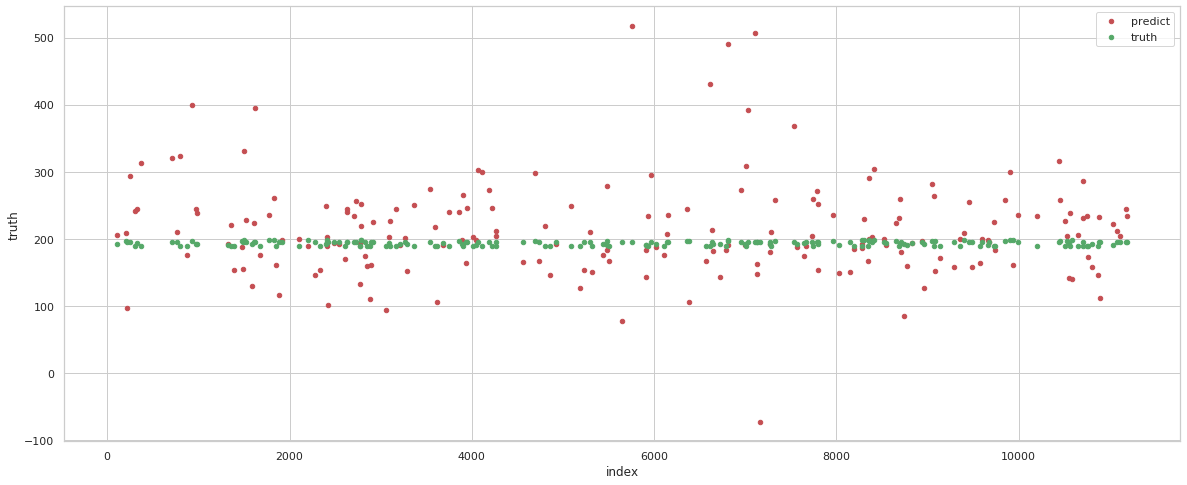

In [105]:
df_linear_result_2 = generate_df_result(y_linear_pred, y_test)

show_graph_truth_prediction(df_linear_result_2)

### 8.3 Polynomial Regression

### 8.4 RandomForest

In [106]:
regressor = RandomForestRegressor()

In [107]:
cv_results = cross_val_results(regressor, df, df_target)

0it [00:00, ?it/s]/home/jessinra/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
10it [00:53,  5.29s/it]


In [108]:
sorted_metrics = sorted(cv_results.keys())

metrics = generate_result_metrics(sorted_metrics, cv_results)
RESULT["Random Forest with Outlier"] = metrics
display(metrics)
display(metrics.describe())

Mean Absolute Error  Mean Square Error  Root Mean Square Error
0            31.671160        5078.733452               71.265233
1            20.831879        1408.061626               37.524147
2            43.223694       10350.755049              101.738661
3            23.130585        3355.634975               57.927843
4            33.948346        4414.267378               66.439953
5            22.809367        5605.563429               74.870311
6            28.544390        3029.503375               55.040925
7            36.693983        5479.497592               74.023629
8            69.744885       36991.913551              192.332820
9           150.167284      320064.522248              565.742452

Mean Absolute Error  Mean Square Error  Root Mean Square Error
count            10.000000          10.000000               10.000000
mean             46.076557       39577.845267              129.690597
std              39.240569       99096.993552              159.018497
min              20.831879        1408.061626               37.524147
25%              24.484037        3620.293076               60.055870
50%              32.809753        5279.115522               72.644431
75%              41.591266        9164.457144               95.021573
max             150.167284      320064.522248              565.742452

In [109]:
model = regressor.fit(X_train, y_train.values.ravel())

y_random_forest_pred = model.predict(X_test)

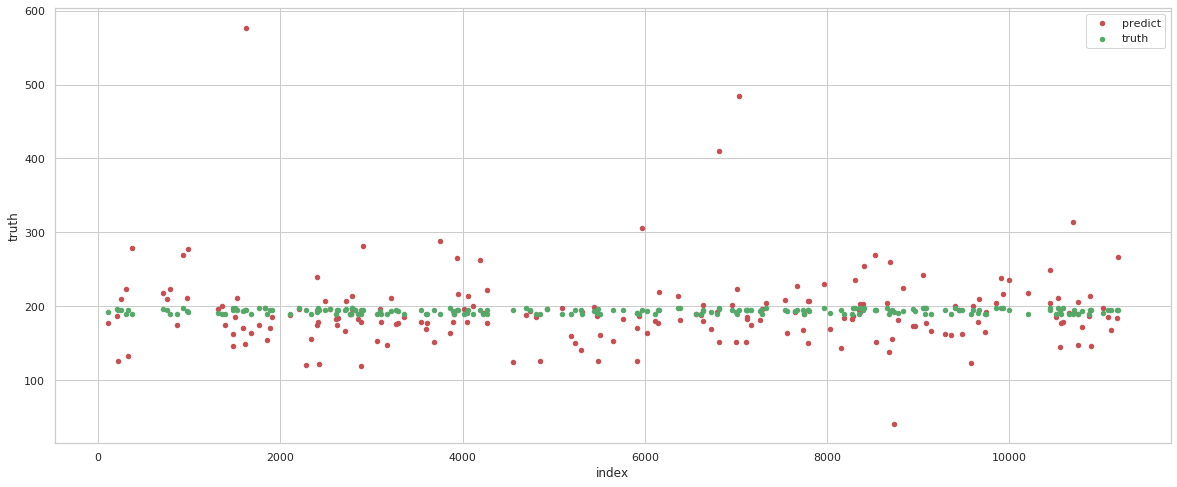

In [110]:
df_random_forest_result_2 = generate_df_result(y_random_forest_pred, y_test)

show_graph_truth_prediction(df_random_forest_result_2)

### 8.5 XGBoost

In [111]:
regressor = XGBRegressor()

In [112]:
cv_results = cross_val_results(regressor, df, df_target)

0it [00:00, ?it/s]

[16:55:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1it [00:10, 10.28s/it]

[16:55:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


2it [00:20, 10.26s/it]

[16:55:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


3it [00:30, 10.13s/it]

[16:55:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


4it [00:40, 10.16s/it]

[16:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


5it [00:50,  9.97s/it]

[16:56:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


6it [00:59,  9.90s/it]

[16:56:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


7it [01:09,  9.85s/it]

[16:56:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


8it [01:19,  9.82s/it]

[16:56:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


9it [01:29,  9.79s/it]

[16:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


10it [01:38,  9.82s/it]


In [113]:
sorted_metrics = sorted(cv_results.keys())

metrics = generate_result_metrics(sorted_metrics, cv_results)
RESULT["XGBoost with Outlier"] = metrics
display(metrics)
display(metrics.describe())

Mean Absolute Error  Mean Square Error  Root Mean Square Error
0            42.842539        5732.342400               75.712234
1            30.388388        2261.127471               47.551314
2            52.474747       13665.816325              116.900882
3            32.213379        2862.677281               53.503993
4            40.635858        4625.306592               68.009607
5            31.208551        3965.629827               62.973247
6            37.062929        3107.700972               55.746758
7            42.744183        4993.416921               70.664113
8            67.556176       20191.054783              142.095231
9           164.261262      342454.310330              585.195959

Mean Absolute Error  Mean Square Error  Root Mean Square Error
count            10.000000          10.000000               10.000000
mean             54.138801       40385.938290              127.835334
std              40.292971      106289.451156              163.449162
min              30.388388        2261.127471               47.551314
25%              33.425767        3322.183186               57.553380
50%              41.690021        4809.361756               69.336860
75%              50.066695       11682.447844              106.603720
max             164.261262      342454.310330              585.195959

In [114]:
model = regressor.fit(X_train, y_train.values.ravel())

y_xgb_pred = model.predict(X_test)

[16:56:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


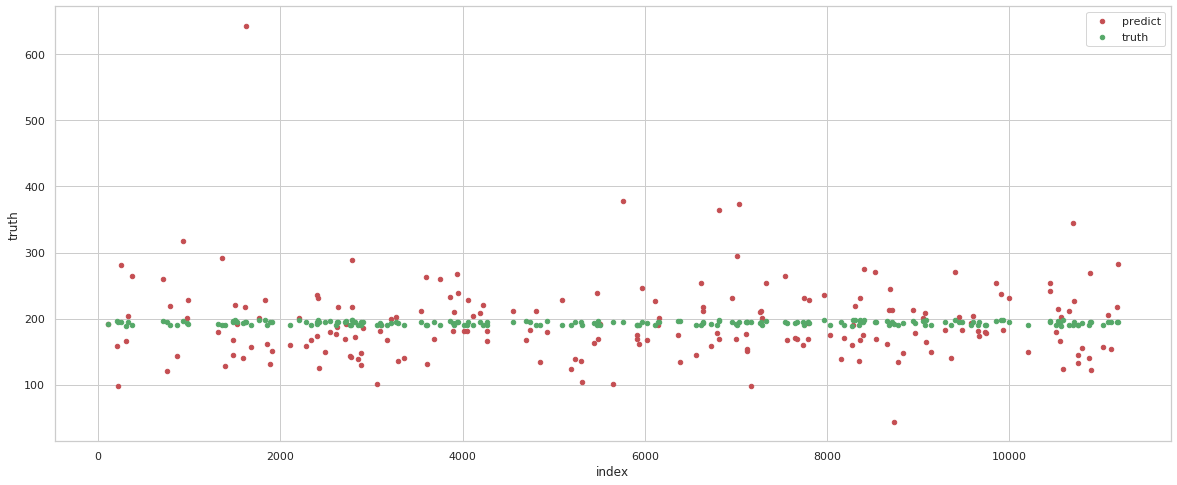

In [115]:
df_xgb_result_2 = generate_df_result(y_xgb_pred, y_test)

show_graph_truth_prediction(df_xgb_result_2)

### 8.6 NN

In [116]:
model_nn = Sequential()
model_nn.add(Dense(16, kernel_initializer='normal', input_dim=X_train.shape[1], activation="relu"))
model_nn.add(Dense(16, kernel_initializer='normal', activation="relu"))
model_nn.add(Dense(8, kernel_initializer='normal', activation="relu"))
model_nn.add(Dense(8, kernel_initializer='normal', activation="relu"))
model_nn.add(Dense(1, kernel_initializer='normal', activation="linear"))

model_nn.compile(loss="mean_absolute_error", 
                 optimizer="adam",
                 metrics=['mean_absolute_error'])

In [117]:
model_nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                1376      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 1,865
Trainable params: 1,865
Non-trainable params: 0
_________________________________________________________________


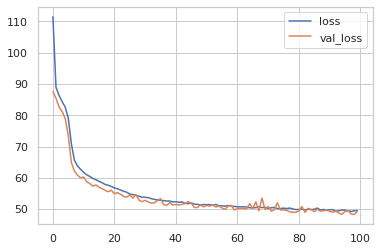

In [118]:
model_nn.fit(X_train, y_train,
            validation_split=0.2,
            epochs=100,
            batch_size=128,
            callbacks=[plot],
            verbose=1)

In [119]:
y_nn_pred = model_nn.predict(X_test)

mse = mean_squared_error(y_test, y_nn_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_nn_pred)

print("Mean Squared Error: {0:.10f}".format(mse))
print("Root Mean Squared Error: {0:.10f}".format(rmse))
print("Mean Absolute Error: {0:.10f}".format(mae))

Mean Squared Error: 33188.4654021053
Root Mean Squared Error: 182.1770166681
Mean Absolute Error: 50.9404425028


In [120]:
metrics = pd.DataFrame([mae, mse, rmse], index=['Mean Absolute Error', 'Mean Square Error', 'Root Mean Square Error']).T
RESULT["NN with Outlier"] = metrics
display(metrics)

Mean Absolute Error  Mean Square Error  Root Mean Square Error
0            50.940443       33188.465402              182.177017

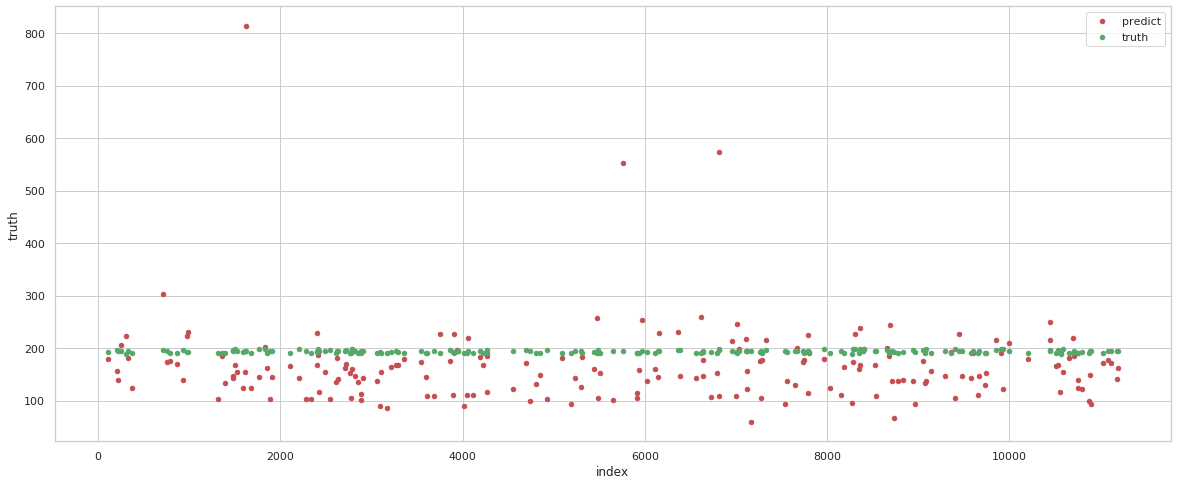

In [121]:
df_nn_result_2 = generate_df_result(y_nn_pred, y_test)

show_graph_truth_prediction(df_nn_result_2)

## 9. Conclusion

In [122]:
agg = []
for key in RESULT:
    result = pd.DataFrame(RESULT[key])
    agg.append([key] + list(result.describe().mean()))

agg_result = pd.DataFrame(agg, columns=['Model', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])
agg_result.sort_values(by="Mean Absolute Error")

Model  Mean Absolute Error  Mean Squared Error  \
1        Random Forest no Outlier            24.810559         7317.753911   
2              XGBoost no Outlier            29.289241         7895.421338   
3                   NN no Outlier            30.509328         4752.280421   
0    Linear Regression no Outlier            35.816298         9464.358339   
7                 NN with Outlier            43.806094        28447.398916   
5      Random Forest with Outlier            45.650168        59777.661054   
6            XGBoost with Outlier            53.032988        63901.852504   
4  Linear Regression with Outlier            65.897033        69876.266196   

   Root Mean Squared Error  
1                59.956626  
2                61.923778  
3                63.964960  
0                72.615663  
7               156.294586  
5               141.212196  
6               145.940716  
4               162.630884

### 1. EDA

dataset yang digunakan terdiri dari 56k rows, beberapa memiliki NaN value, terutama di kolom `m_body`, `m_engine_capacity`, `m_feature`, dan `m_seller_type`. artinya, perlu ada penanganan NaN untuk beberapa kolom tsb.

Beberapa kolom adalah categorical, dan karena kasus kali ini berupa regresi, maka sebaiknya kolom-kolom tsb di drop.

### 2. Preprocess

* harga di normalize (diubah menjadi satuan juta), angka kecil digunakan karena mempertimbangkan model yang digunakan.

* yg bersifat kategorical (id dll di drop) kecuali `make` dilakukan one hot -> harus hati hati dalam melakukan one hot agar data tidak menjadi terlalu sparse

* lakukan drop NA dan Fill NA beberapa kolom

* onehot encode untuk feature -> hanya jadi bberpa kolom, menandakan ada tidaknya fitur komponen mobil

* engine diubah jdi kategorical, walaupun kategorical, semantic urutannya dipertahankan (jd gpp, ga harus One hot)

### 3. Outlier

dari sisi data, terdapat harga harga yang bersifat outlier, karena mengingat kasus yang dilakukan adalah regresi, sebenarnya hasil akan lebih baik jika outlier dibuang, namun artinya kita mengabaikan kasus kasus tertentu (misalnya mobil antik, mobil baru pakai masih bagus, dll)

### 4. Experiment

* dilakukan 2x, with outlier dan no outlier
* 2 metric yg dpakai -> RMSE dan MAE (penjelasan detail diatas)<br>
* data split 80:20 
* model : Lin reg, RForest, XGBoost, NN <br>

* Alasan: <br> 
    * Linreg -> default regresi
    * RForest -> karena data banyak kategorical, maka perlu model yang dapat handle nonlinearity, cepat dan robust untuk segala hal
    * XGB -> sama dengan RForest, komplement saja (bagging vs boosting)
    * NN -> data besar, worth buat dicoba

### 5. Hasil akhir

1. experiment tanpa outlier menghasilkan error lebih kecil -> ofcourse, karena artinya kita mengurangi variansi data, regresi akan lebih mudah dilakukan (fokus pada data yang berdekatan, outlier dianggp tidak ada)

2. model model non linear > lin reg: <br> sesuai hipotesis bahwa data bersifat non linear (given karena banyak yg berupa kategorical) makanya model non linear lebih baik